In [1]:
%matplotlib inline
from __future__ import print_function, unicode_literals
import sys, os, glob
import re
import datetime as dt
import seaborn as sns
import json
from collections import OrderedDict

In [2]:
from pygaarst import raster
sys.path.append("../firedetection/")
import viirstools as vt
import viirsswathtools as vst
import viirsifire as vif

In [3]:
reload(vif)

<module 'viirsifire' from '../firedetection/viirsifire.pyc'>

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:
import fiona.crs
from shapely.geometry import Polygon, Point, LineString
import shapely.wkt
import pandas as pd
import geopandas as gp

In [6]:
ALT1 = True
ALT2 = False 

basedir = '/Volumes/cwdata1/VIIRS/GINA/dds.gina.alaska.edu/NPP/viirs/'
outdir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/rasterout/'
if ALT1:
    basedir = '/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/'
elif ALT2:
    basedir = '/Volumes/SCIENCE/Fire/DATA_BY_AREA/2015/VIIRS/'

if os.path.isdir(basedir):
    print(basedir, "exists")
else:
    print("Please check directory {}: cannot access it.".format(basedir))

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2015VIIRSMODIS/VIIRS/ exists


In [7]:
granulecatalogfn = 'viirsgranulecatalog_in_ROI.json'

In [8]:
sockeye_lon, sockeye_lat = (-150.08544, 61.84486)
fairbanks_lon, fairbanks_lat = (-147.723056, 64.843611)
sample_lon, sample_lat = sockeye_lon, sockeye_lat
sampleloc = Point(sample_lon, sample_lat)

In [9]:
roi = gp.GeoDataFrame.from_file('../data/BorealAKForUAFSmoke.json')

In [10]:
with open(os.path.join(basedir, granulecatalogfn), 'rU') as src:
    granuledir = json.load(src)

In [11]:
crs = fiona.crs.from_epsg('4326')
granuleDF = pd.DataFrame.from_dict(granuledir, orient='index')
granuleDF = granuleDF.loc[granuleDF['iband_complete']]
granuleDF['geometry'] = granuleDF['edgepolygon_I'].apply(shapely.wkt.loads)

granuleDF = gp.GeoDataFrame(
    granuleDF, 
    crs=crs,
    geometry=granuleDF.geometry)
granuleDF = granuleDF.loc[granuleDF['geometry'].contains(sampleloc), :]
print(granuleDF.shape)
granuleDF.head()

(70, 36)


,GITCO,edgepolygon_I,GMTCO,mband_complete,ascending_node,borealoverlap,SVM16,SVM14,SVM15,SVM12,...,SVM06,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,geometry
20150527_2045150,GITCO_npp_d20150527_t2045150_e2046392_b18550_c...,POLYGON ((-94.47161865234375 64.99661254882812...,GMTCO_npp_d20150527_t2045150_e2046392_b18550_c...,True,True,0.358324,SVM16_npp_d20150527_t2045150_e2046392_b18550_c...,SVM14_npp_d20150527_t2045150_e2046392_b18550_c...,SVM15_npp_d20150527_t2045150_e2046392_b18550_c...,SVM12_npp_d20150527_t2045150_e2046392_b18550_c...,...,SVM06_npp_d20150527_t2045150_e2046392_b18550_c...,SVM01_npp_d20150527_t2045150_e2046392_b18550_c...,SVM03_npp_d20150527_t2045150_e2046392_b18550_c...,SVM02_npp_d20150527_t2045150_e2046392_b18550_c...,NPP001134315156,SVM09_npp_d20150527_t2045150_e2046392_b18550_c...,SVM08_npp_d20150527_t2045150_e2046392_b18550_c...,SVDNB_npp_d20150527_t2045150_e2046392_b18550_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-94.47161865234375 64.99661254882812...
20150527_2224498,GITCO_npp_d20150527_t2224498_e2226140_b18551_c...,POLYGON ((-121.3077774047852 58.46441268920898...,GMTCO_npp_d20150527_t2224498_e2226140_b18551_c...,True,True,0.352706,SVM16_npp_d20150527_t2224498_e2226140_b18551_c...,SVM14_npp_d20150527_t2224498_e2226140_b18551_c...,SVM15_npp_d20150527_t2224498_e2226140_b18551_c...,SVM12_npp_d20150527_t2224498_e2226140_b18551_c...,...,SVM06_npp_d20150527_t2224498_e2226140_b18551_c...,SVM01_npp_d20150527_t2224498_e2226140_b18551_c...,SVM03_npp_d20150527_t2224498_e2226140_b18551_c...,SVM02_npp_d20150527_t2224498_e2226140_b18551_c...,NPP001134374901,SVM09_npp_d20150527_t2224498_e2226140_b18551_c...,SVM08_npp_d20150527_t2224498_e2226140_b18551_c...,SVDNB_npp_d20150527_t2224498_e2226140_b18551_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-121.3077774047852 58.46441268920898...
20150527_2227406,GITCO_npp_d20150527_t2227406_e2229048_b18551_c...,POLYGON ((-118.6018524169922 68.13177490234375...,GMTCO_npp_d20150527_t2227406_e2229048_b18551_c...,True,True,0.135385,SVM16_npp_d20150527_t2227406_e2229048_b18551_c...,SVM14_npp_d20150527_t2227406_e2229048_b18551_c...,SVM15_npp_d20150527_t2227406_e2229048_b18551_c...,SVM12_npp_d20150527_t2227406_e2229048_b18551_c...,...,SVM06_npp_d20150527_t2227406_e2229048_b18551_c...,SVM01_npp_d20150527_t2227406_e2229048_b18551_c...,SVM03_npp_d20150527_t2227406_e2229048_b18551_c...,SVM02_npp_d20150527_t2227406_e2229048_b18551_c...,NPP001134376608,SVM09_npp_d20150527_t2227406_e2229048_b18551_c...,SVM08_npp_d20150527_t2227406_e2229048_b18551_c...,SVDNB_npp_d20150527_t2227406_e2229048_b18551_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-118.6018524169922 68.13177490234375...
20150528_2026193,GITCO_npp_d20150528_t2026193_e2027435_b18565_c...,POLYGON ((-89.60297393798828 65.35804748535156...,GMTCO_npp_d20150528_t2026193_e2027435_b18565_c...,True,True,0.267876,SVM16_npp_d20150528_t2026193_e2027435_b18565_c...,SVM14_npp_d20150528_t2026193_e2027435_b18565_c...,SVM15_npp_d20150528_t2026193_e2027435_b18565_c...,SVM12_npp_d20150528_t2026193_e2027435_b18565_c...,...,SVM06_npp_d20150528_t2026193_e2027435_b18565_c...,SVM01_npp_d20150528_t2026193_e2027435_b18565_c...,SVM03_npp_d20150528_t2026193_e2027435_b18565_c...,SVM02_npp_d20150528_t2026193_e2027435_b18565_c...,NPP001135167802,SVM09_npp_d20150528_t2026193_e2027435_b18565_c...,SVM08_npp_d20150528_t2026193_e2027435_b18565_c...,SVDNB_npp_d20150528_t2026193_e2027435_b18565_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-89.60297393798828 65.35804748535156...
20150528_2207195,GITCO_npp_d20150528_t2207195_e2208437_b18566_c...,POLYGON ((-115.5025863647461 63.68019104003906...,GMTCO_npp_d20150528_t2207195_e2208437_b18566_c...,True,True,0.523199,SVM16_npp_d20150528_t2207195_e2208437_b18566_c...,SVM14_npp_d20150528_t2207195_e2208437_b18566_c...,SVM15_npp_d20150528_t2207195_e2208437_b18566_c...,SVM12_npp_d20150528_t2207195_e2208437_b18566_c...,...,SVM06_npp_d20150528_t2

In [12]:
idx = granuleDF.index

In [13]:
startdate = '20150614'
enddate = '20150620'
granules = [idx for idx in granuleDF.index if idx > startdate and idx < enddate]
granuleDF.loc[granules]


,GITCO,edgepolygon_I,GMTCO,mband_complete,ascending_node,borealoverlap,SVM16,SVM14,SVM15,SVM12,...,SVM06,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,geometry
20150614_1154031,GITCO_npp_d20150614_t1154031_e1155272_b18800_c...,POLYGON ((-170.0320281982422 63.86149597167969...,GMTCO_npp_d20150614_t1154031_e1155272_b18800_c...,True,False,0.361298,SVM16_npp_d20150614_t1154031_e1155272_b18800_c...,SVM14_npp_d20150614_t1154031_e1155272_b18800_c...,SVM15_npp_d20150614_t1154031_e1155272_b18800_c...,SVM12_npp_d20150614_t1154031_e1155272_b18800_c...,...,SVM06_npp_d20150614_t1154031_e1155272_b18800_c...,SVM01_npp_d20150614_t1154031_e1155272_b18800_c...,SVM03_npp_d20150614_t1154031_e1155272_b18800_c...,SVM02_npp_d20150614_t1154031_e1155272_b18800_c...,NPP001149548424,SVM09_npp_d20150614_t1154031_e1155272_b18800_c...,SVM08_npp_d20150614_t1154031_e1155272_b18800_c...,SVDNB_npp_d20150614_t1154031_e1155272_b18800_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-170.0320281982422 63.86149597167969...
20150614_1333361,GITCO_npp_d20150614_t1333361_e1335002_b18801_c...,"POLYGON ((161.7257995605469 70.42258453369141,...",GMTCO_npp_d20150614_t1333361_e1335002_b18801_c...,True,False,0.431700,SVM16_npp_d20150614_t1333361_e1335002_b18801_c...,SVM14_npp_d20150614_t1333361_e1335002_b18801_c...,SVM15_npp_d20150614_t1333361_e1335002_b18801_c...,SVM12_npp_d20150614_t1333361_e1335002_b18801_c...,...,SVM06_npp_d20150614_t1333361_e1335002_b18801_c...,SVM01_npp_d20150614_t1333361_e1335002_b18801_c...,SVM03_npp_d20150614_t1333361_e1335002_b18801_c...,SVM02_npp_d20150614_t1333361_e1335002_b18801_c...,NPP001149608169,SVM09_npp_d20150614_t1333361_e1335002_b18801_c...,SVM08_npp_d20150614_t1333361_e1335002_b18801_c...,SVDNB_npp_d20150614_t1333361_e1335002_b18801_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,"POLYGON ((161.7257995605469 70.42258453369141,..."
20150614_1335015,GITCO_npp_d20150614_t1335015_e1336256_b18801_c...,"POLYGON ((164.0820922851562 65.63762664794922,...",GMTCO_npp_d20150614_t1335015_e1336256_b18801_c...,True,False,0.259280,SVM16_npp_d20150614_t1335015_e1336256_b18801_c...,SVM14_npp_d20150614_t1335015_e1336256_b18801_c...,SVM15_npp_d20150614_t1335015_e1336256_b18801_c...,SVM12_npp_d20150614_t1335015_e1336256_b18801_c...,...,SVM06_npp_d20150614_t1335015_e1336256_b18801_c...,SVM01_npp_d20150614_t1335015_e1336256_b18801_c...,SVM03_npp_d20150614_t1335015_e1336256_b18801_c...,SVM02_npp_d20150614_t1335015_e1336256_b18801_c...,NPP001149609022,SVM09_npp_d20150614_t1335015_e1336256_b18801_c...,SVM08_npp_d20150614_t1335015_e1336256_b18801_c...,SVDNB_npp_d20150614_t1335015_e1336256_b18801_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,"POLYGON ((164.0820922851562 65.63762664794922,..."
20150614_2007390,GITCO_npp_d20150614_t2007390_e2009032_b18805_c...,POLYGON ((-84.31331634521484 66.89517974853516...,GMTCO_npp_d20150614_t2007390_e2009032_b18805_c...,True,True,0.250293,SVM16_npp_d20150614_t2007390_e2009032_b18805_c...,SVM14_npp_d20150614_t2007390_e2009032_b18805_c...,SVM15_npp_d20150614_t2007390_e2009032_b18805_c...,SVM12_npp_d20150614_t2007390_e2009032_b18805_c...,...,SVM06_npp_d20150614_t2007390_e2009032_b18805_c...,SVM01_npp_d20150614_t2007390_e2009032_b18805_c...,SVM03_npp_d20150614_t2007390_e2009032_b18805_c...,SVM02_npp_d20150614_t2007390_e2009032_b18805_c...,NPP001149844588,SVM09_npp_d20150614_t2007390_e2009032_b18805_c...,SVM08_npp_d20150614_t2007390_e2009032_b18805_c...,SVDNB_npp_d20150614_t2007390_e2009032_b18805_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,POLYGON ((-84.31331634521484 66.89517974853516...
20150614_2147138,GITCO_npp_d20150614_t2147138_e2148379_b18806_c...,POLYGON ((-111.5323944091797 60.38159561157227...,GMTCO_npp_d20150614_t2147138_e2148379_b18806_c...,True,True,0.399268,SVM16_npp_d20150614_t2147138_e2148379_b18806_c...,SVM14_npp_d20150614_t2147138_e2148379_b18806_c...,SVM15_npp_d20150614_t2147138_e2148379_b18806_c...,SVM12_npp_d20150614_t2147138_e2148379_b18806_c...,...,SVM06_npp_d

In [14]:
roi

,Description,Name,geometry
0,,Boreal AK and adjacent CA,POLYGON Z ((-166.184299324089 69.0368403963698...


In [72]:
testgranule = granuleDF.loc[u'20150614_2147138']
testpath01 = os.path.join(testgranule['dir'], testgranule['SVI01'])
testpath02 = os.path.join(testgranule['dir'], testgranule['SVI02'])
testpath03 = os.path.join(testgranule['dir'], testgranule['SVI03'])
testscene04 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI04']))
testscene05 = raster.VIIRSHDF5(os.path.join(testgranule['dir'], testgranule['SVI05']))

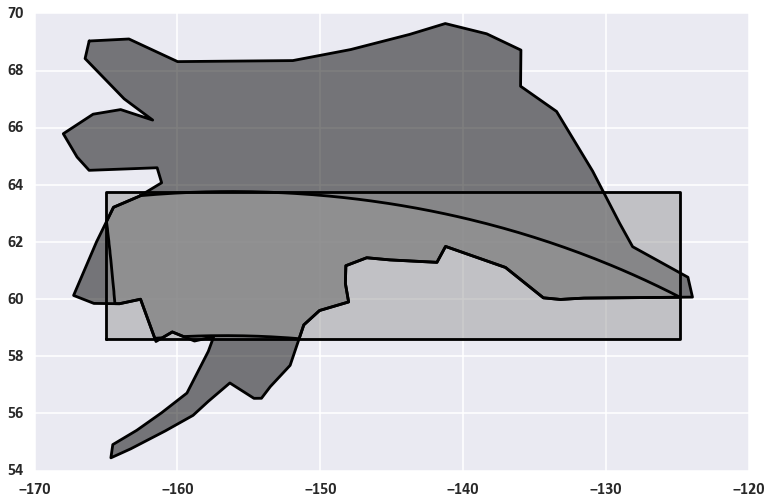

In [73]:
testpoly1 = granuleDF.loc[u'20150615_1135074':'20150615_1135074']
#testpoly1.plot()
testpoly = granuleDF.loc[u'20150615_1135074']['geometry']
roi.plot()
#gp.GeoSeries([granuleDF.loc[u'20150614_2007390']['geometry'].intersection(roi['geometry'][0]).envelope]).plot()
#gp.GeoSeries([granuleDF.loc[u'20150614_2007390']['geometry'].intersection(
#            roi['geometry'][0]).convex_hull.simplify(0.25)]).plot()
gp.GeoSeries([testpoly.intersection(roi.geometry[0])]).plot()
gp.GeoSeries([testpoly.intersection(roi.geometry[0]).envelope]).plot()
ax2 = plt.gca()
ax2.set_ylim(54, 70)
ax2.set_xlim(-170, -120)
ax2.set_aspect(2)

In [74]:
testscene = testscene04
testscene.lats.shape

(1536, 6400)

In [22]:
testpoly = granuleDF.loc[u'20150614_2007390']['geometry']
roipoly = roi.geometry[0]
for corner in testpoly.intersection(roipoly).envelope.boundary.intersection(roipoly.boundary):
    print(corner.x, corner.y)

-148.030962732 59.9304214048
-135.97673798 67.8108829654
-129.77339011 60.0452233757
-129.77339011 63.3580537725


In [50]:
testscene04.getnearestidx(63.3580537725, -129.77339011)

(0, 3774)

In [51]:
testscene04.ascending_node

False

In [18]:
roipoly = roi['geometry'][0]
intersect = testpoly.intersection(roipoly)
intersect.envelope.boundary.intersection(roipoly.boundary)

NameError: name 'testpoly' is not defined

In [26]:
#%%timeit
imin = 1536
jmin = 6400
imax = jmax = 0
testpoly = granuleDF.loc[u'20150614_2007390']['geometry']
corners = testpoly.intersection(roipoly).envelope.intersection(roipoly.boundary).boundary
for corner in corners:
    lon, lat = corner.x, corner.y
    ii, jj = testscene.getnearestidx(lat, lon)
    if ii < imin:
        imin = ii
    if ii > imax:
        imax = ii 
    if jj < jmin:
        jmin = jj 
    if jj > jmax:
        jmax = jj 
print (imin, imax, jmin, jmax)

258 1535 0 1701


In [20]:
%%timeit
imin = 1536
jmin = 6400
imax = jmax = 0
for lon, lat in granuleDF.loc[u'20150614_2007390']['geometry'].intersection(roi['geometry'][0]).envelope.boundary.coords[:-1]:
    ii, jj = testscene.getnearestidx(lat, lon)
    if ii < imin:
        imin = ii
    if ii > imax:
        imax = ii 
    if jj < jmin:
        jmin = jj 
    if jj > jmax:
        jmax = jj 
print (imin, imax, jmin, jmax)

255 1535 0 2130
255 1535 0 2130
255 1535 0 2130
255 1535 0 2130
1 loop, best of 3: 6.26 s per loop


In [21]:
%%timeit
imin = 1536
jmin = 6400
imax = jmax = 0
for lon, lat, _ in granuleDF.loc[u'20150614_2007390']['geometry'].intersection(roi['geometry'][0]).convex_hull.simplify(0.25).boundary.coords[:-1]:
    ii, jj = testscene.getnearestidx(lat, lon)
    if ii < imin:
        imin = ii
    if ii > imax:
        imax = ii 
    if jj < jmin:
        jmin = jj 
    if jj > jmax:
        jmax = jj 
print (imin, imax, jmin, jmax)

258 1535 0 2069
258 1535 0 2069
258 1535 0 2069
258 1535 0 2069
1 loop, best of 3: 11.3 s per loop


In [19]:
gisbasedir = "/Volumes/SCIENCE_mobile_Mac/GENERAL_GIS/"
productdir = "/Users/chris/Dropbox/Research/PhD/2015VIRSPaper/Sockeye_img/"

In [21]:
railroads = os.path.join(gisbasedir, "matsugov.us/rr/railroad_latlon")
primaryroads = os.path.join(gisbasedir, "catalog.data.gov/tl_2013_02_prisecroads/tl_2013_02_prisecroads")
sideroads = os.path.join(gisbasedir, "matsugov.us/rds/rds_latlon")

In [22]:
earth='cornsilk'
water='lightskyblue'

In [23]:
sns.set(rc={'image.cmap': 'gist_heat'})
#sns.set(rc={'image.cmap': 'magma'})
sns.set_context("poster")

myfontsize = 20
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : myfontsize}
matplotlib.rc('font', **font)
matplotlib.axes.rcParams['axes.labelsize']=myfontsize-4
matplotlib.axes.rcParams['axes.titlesize']=myfontsize
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))


In [81]:
cbarfraction = 0.05
cbarpad = 0.05

#imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 500, 400)
imin, imax, jmin, jmax = testscene04.crop(sample_lat, sample_lon, 50, 50)
print(
    imin, imax, jmin, jmax, 
    testscene04.lats[testscene04.getnearestidx(sample_lat, sample_lon)], 
    testscene04.lons[testscene04.getnearestidx(sample_lat, sample_lon)]
)
print(sample_lat, sample_lon)
datestamp = vt.getdatestamp_AKDT(testscene04)
pixelq4 = testscene04.pixelquality[imin:imax, jmin:jmax]
pixelq5 = testscene05.pixelquality[imin:imax, jmin:jmax]
# find row indices where no data present
excluderows = np.where((pixelq4[:, 0] == 2) | (pixelq4[:, -1] == 2) )


1280 1381 4152 4253 61.844 -150.086
61.84486 -150.08544


In [82]:
print(datestamp)

2015-06-14 13:47:13 AKDT


In [83]:
testscene04.meta

{u'Data_Product': {u'AggregateBeginningDate': u'20150614',
  u'AggregateBeginningGranuleID': u'NPP001149904333',
  u'AggregateBeginningOrbitNumber': u'18806',
  u'AggregateBeginningTime': u'214713.824127Z',
  u'AggregateEndingDate': u'20150614',
  u'AggregateEndingGranuleID': u'NPP001149904333',
  u'AggregateEndingOrbitNumber': u'18806',
  u'AggregateEndingTime': u'214837.999747Z',
  u'Instrument_Short_Name': u'VIIRS',
  u'N_Collection_Short_Name': u'VIIRS-I4-SDR',
  u'N_Dataset_Type_Tag': u'SDR',
  u'N_Processing_Domain': u'OPS'},
 u'Distributor': u'cspp',
 u'Mission_Name': u'NPP',
 u'N_Dataset_Source': u'all-',
 u'N_GEO_Ref': u'GITCO_npp_d20150614_t2147138_e2148379_b18806_c20150614220958553149_cspp_dev.h5',
 u'N_HDF_Creation_Date': u'20150614',
 u'N_HDF_Creation_Time': u'221000.925427Z',
 u'Number_of_Data_Products': u'1',
 u'Platform_Short_Name': u'NPP'}

In [84]:
nightscene = True
zenithangles = testscene04.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")
print(nightscene)

False


In [85]:
print(testscene04.ascending_node)

True


In [86]:
imin, imax, jmin, jmax

(1280, 1381, 4152, 4253)

In [87]:
rasterlist = []
excluderows

(array([], dtype=int64),)

## Calculate cells with at duplicate locations

In [88]:
skips = vst.get_skips(testscene04, imin, imax, jmin, jmax)
skiprows = vst.get_badrows(skips)
skiprows

array([29, 30, 31, 32, 33, 61, 62, 63, 64, 65, 94, 95, 96, 97])

## Plots

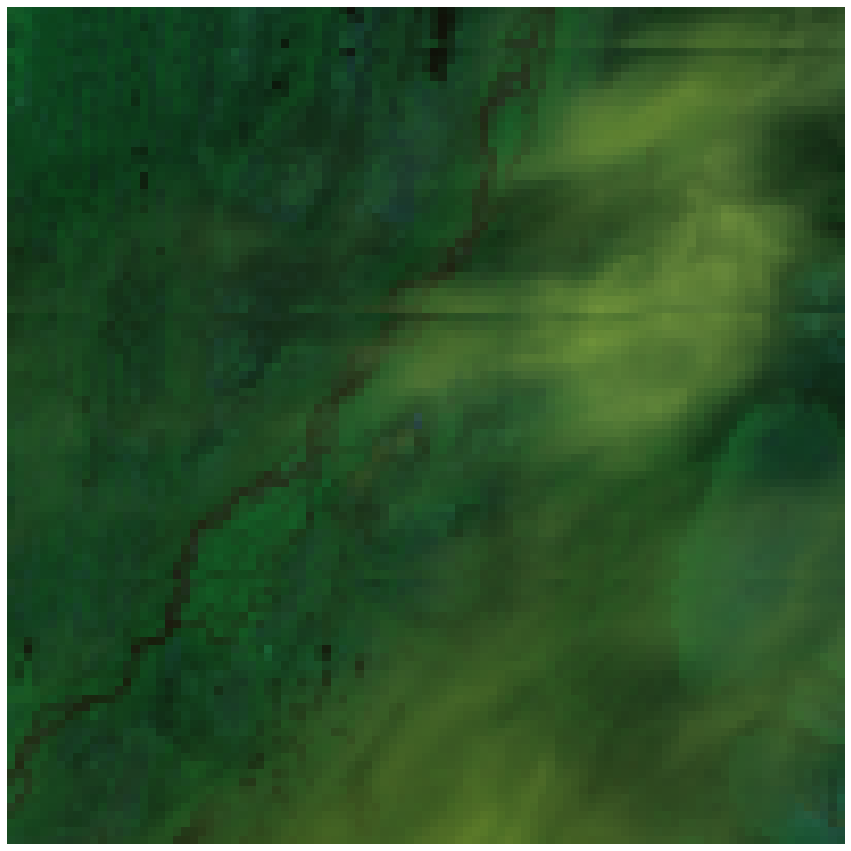

In [89]:
# zeroth plot: visible RGB, just for fun

plotrasters = []
for datapath in [testpath01, testpath02, testpath03]:
    scene = raster.VIIRSHDF5(datapath)
    bandname = scene.bandname
    testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
    mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
    plotraster = np.fliplr(testdat*mult + add)
    plotraster = np.delete(plotraster, excluderows, 0)
    plotrasters.append(plotraster)

rgbraster = np.dstack(plotrasters)

if testscene04.ascending_node:
    rgbraster = np.flipud(rgbraster)
else:
    rgbraster = np.fliplr(rgbraster)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', cmap='bone')
dataplot = ax1.imshow(rgbraster, interpolation='nearest')
#ax1.set_title('Western Alaska: Overview plot from band {}, {}'.format(
#        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
#plt.savefig("/Users/cwaigl/Desktop/testfires.png", dpi=300)
plt.show()

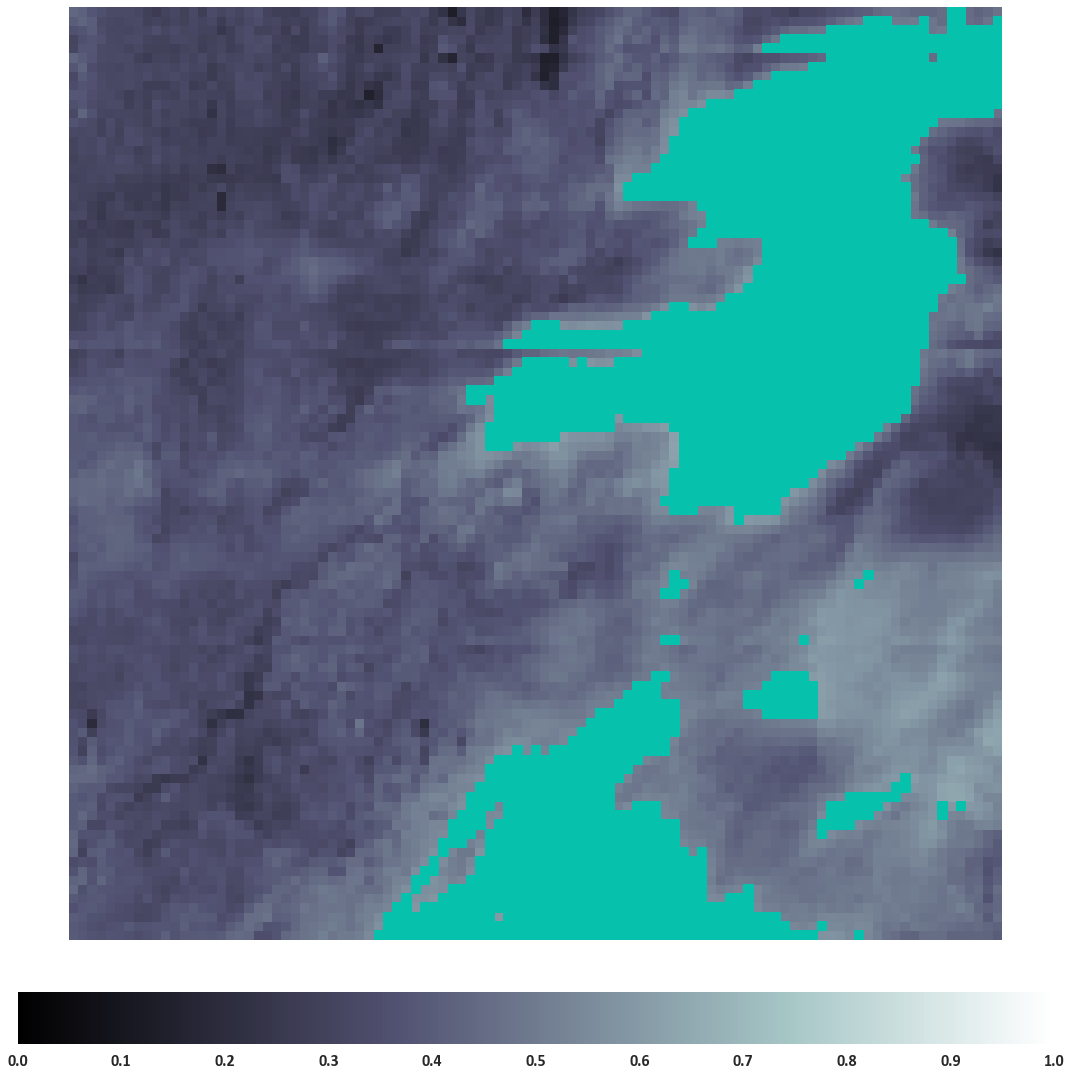

In [90]:
# zeroth plot prime: print sum of first two bands reflectance:

scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = np.fliplr(testdat*mult + add)
plotraster1 = np.delete(plotraster1, excluderows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = np.fliplr(testdat*mult + add)
plotraster2 = np.delete(plotraster2, excluderows, 0)

scene = testscene04
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
plotraster4 = np.fliplr(testdat*mult + add)
plotraster4 = np.delete(plotraster4, excluderows, 0)

scene = testscene05
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]
plotraster5 = np.fliplr(testdat*mult + add)
plotraster5 = np.delete(plotraster5, excluderows, 0)

if nightscene:
    cloudcondition = np.logical_and(
        plotraster4 < 295, plotraster5 < 265
    )
else:
    cloudcondition = np.logical_or(
        plotraster5 < 265, 
        np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295)
    )
    cloudcondition = np.logical_or(
        cloudcondition,
        np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),
    )
cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))

cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

if not testscene04.ascending_node:
    for rast in [plotraster1, plotraster2, plotraster5]:
        rast = np.flipud(np.fliplr(rast))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(plotraster1+plotraster2, cmap='bone', vmin=0, vmax=1)
cloudplot = ax1.pcolormesh(cloudmask, cmap=cmap4, vmin=0, vmax=1)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)

#ax1.set_title('Western Alaska: Overview plot from band {}, {}'.format(
#        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
#plt.savefig("testfires")
plt.show()

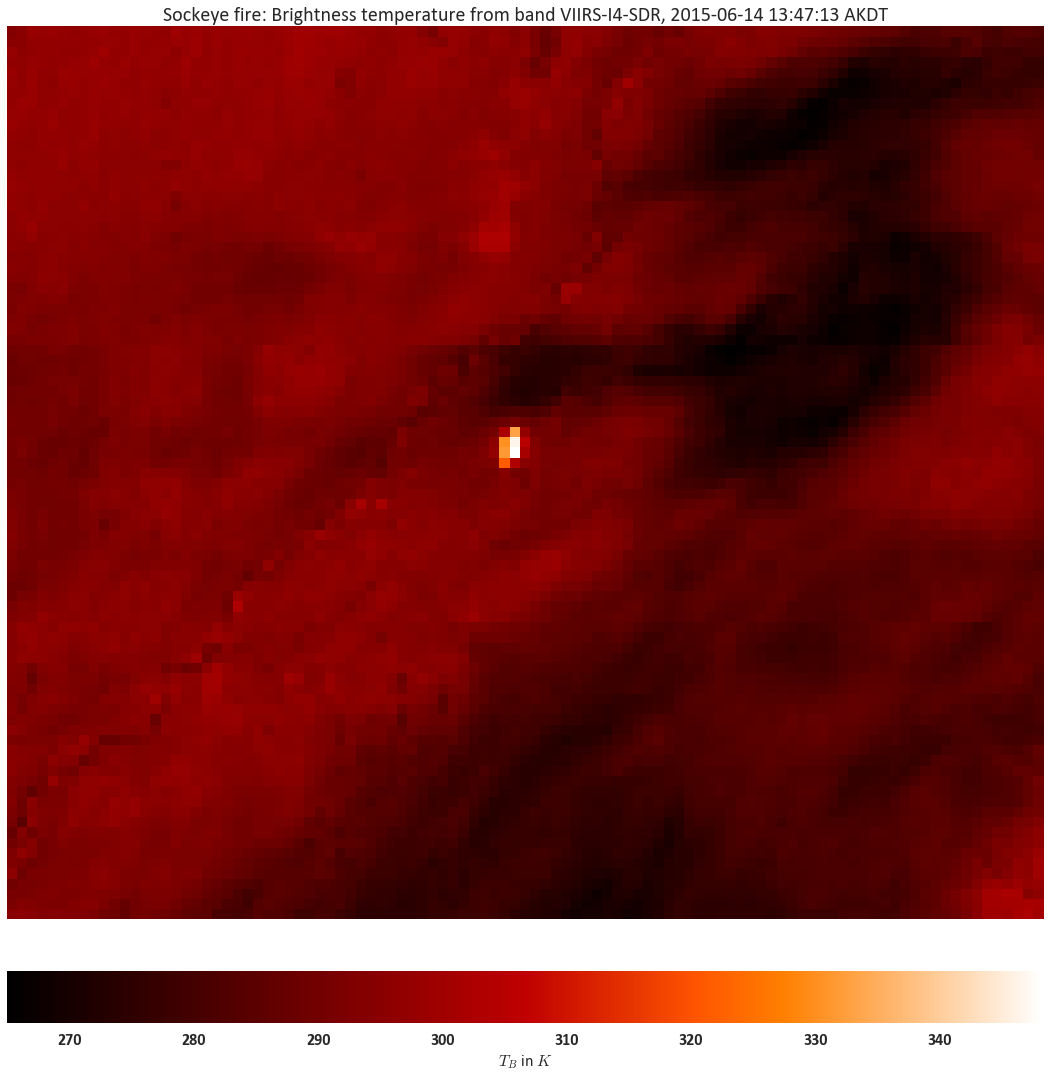

In [91]:
# first plot
scene = testscene04
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

testdat = testdat*mult + add
rasterlist.append(testdat)
plotraster = np.fliplr(np.delete(testdat, skiprows, 0))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
#dataplot = ax1.pcolormesh(plotraster, vmin=260, vmax=340)
dataplot = ax1.pcolormesh(plotraster)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
ax1.set_title('Sockeye fire: Brightness temperature from band {}, {}'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.show()

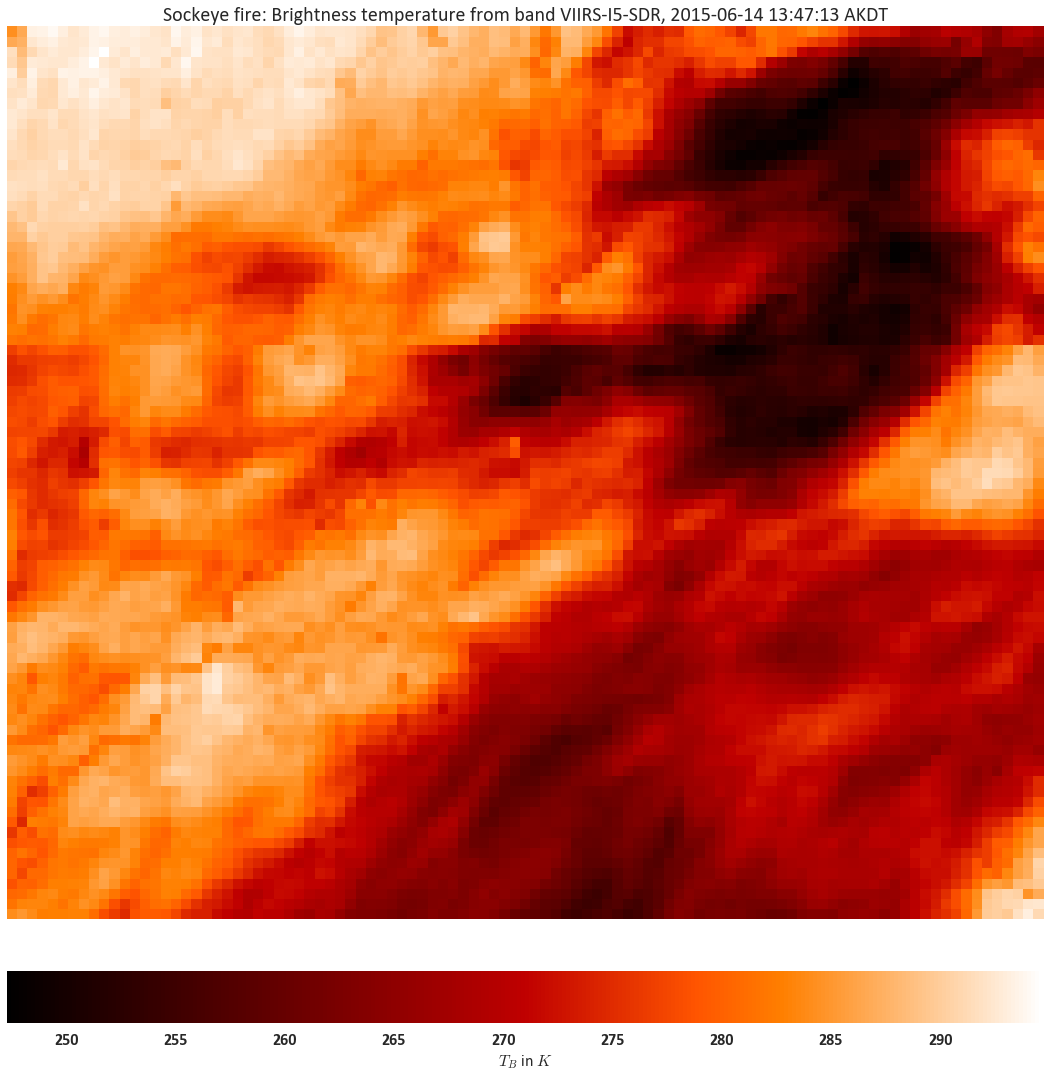

In [92]:
# second plot
scene = testscene05
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

testdat = testdat*mult + add
rasterlist.append(testdat)
plotraster = np.fliplr(np.delete(testdat, skiprows, 0))

plotraster_river = np.ma.masked_where(plotraster <= 295, np.ones(plotraster.shape))

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#dataplot = ax1.imshow(np.flipud(plotraster) , interpolation='nearest', vmin=280, vmax=370)
dataplot = ax1.pcolormesh(plotraster)
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$T_B$ in $K$")
ax1.set_title('Sockeye fire: Brightness temperature from band {}, {}'.format(
        scene.meta['Data_Product']['N_Collection_Short_Name'], datestamp))
plt.show()

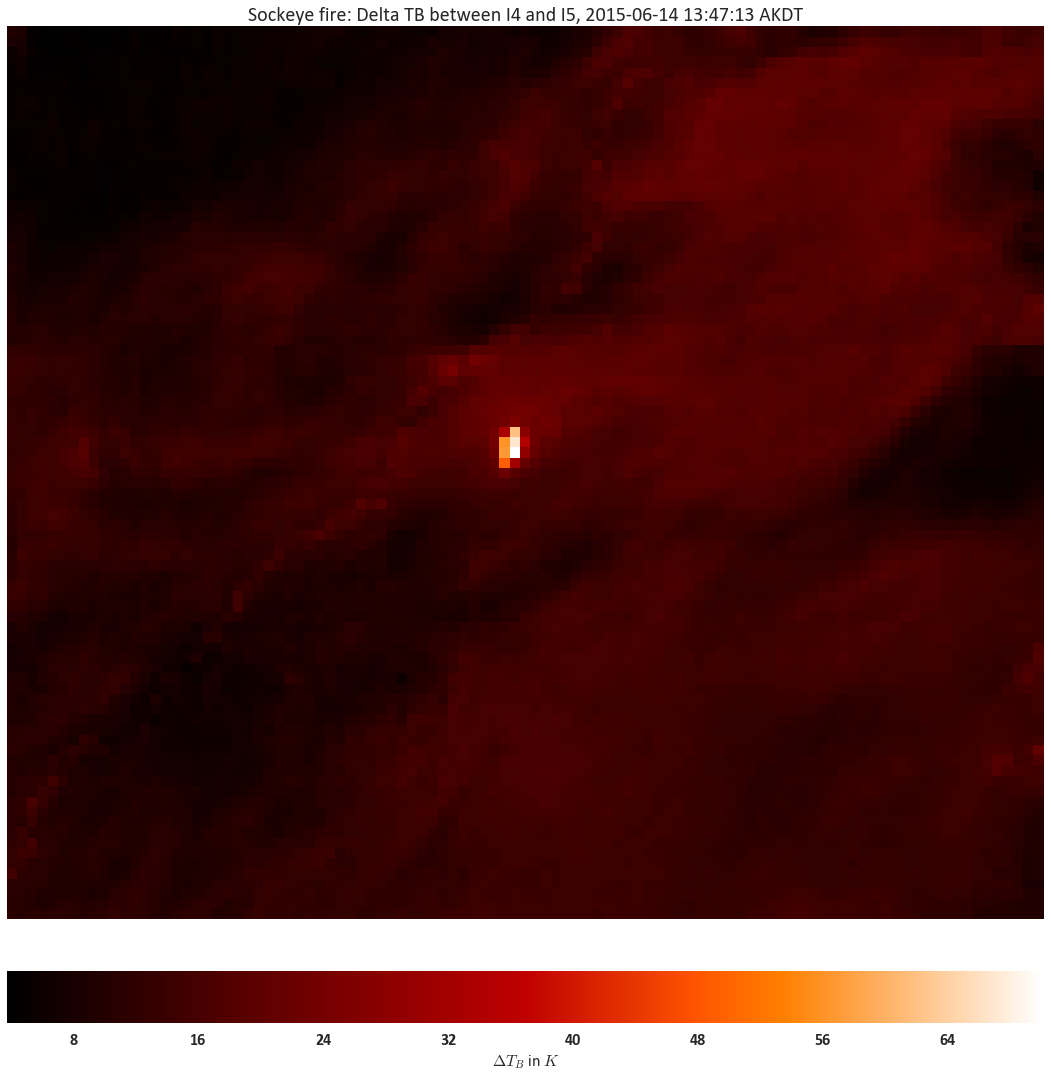

In [93]:
# third plot
plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  plotraster4 - plotraster5
plotraster45 = np.delete(plotraster45, skiprows, 0)


fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45))
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("$\Delta T_B$ in $K$")
ax1.set_title('Sockeye fire: Delta TB between I4 and I5, {}'.format(datestamp))
plt.show()

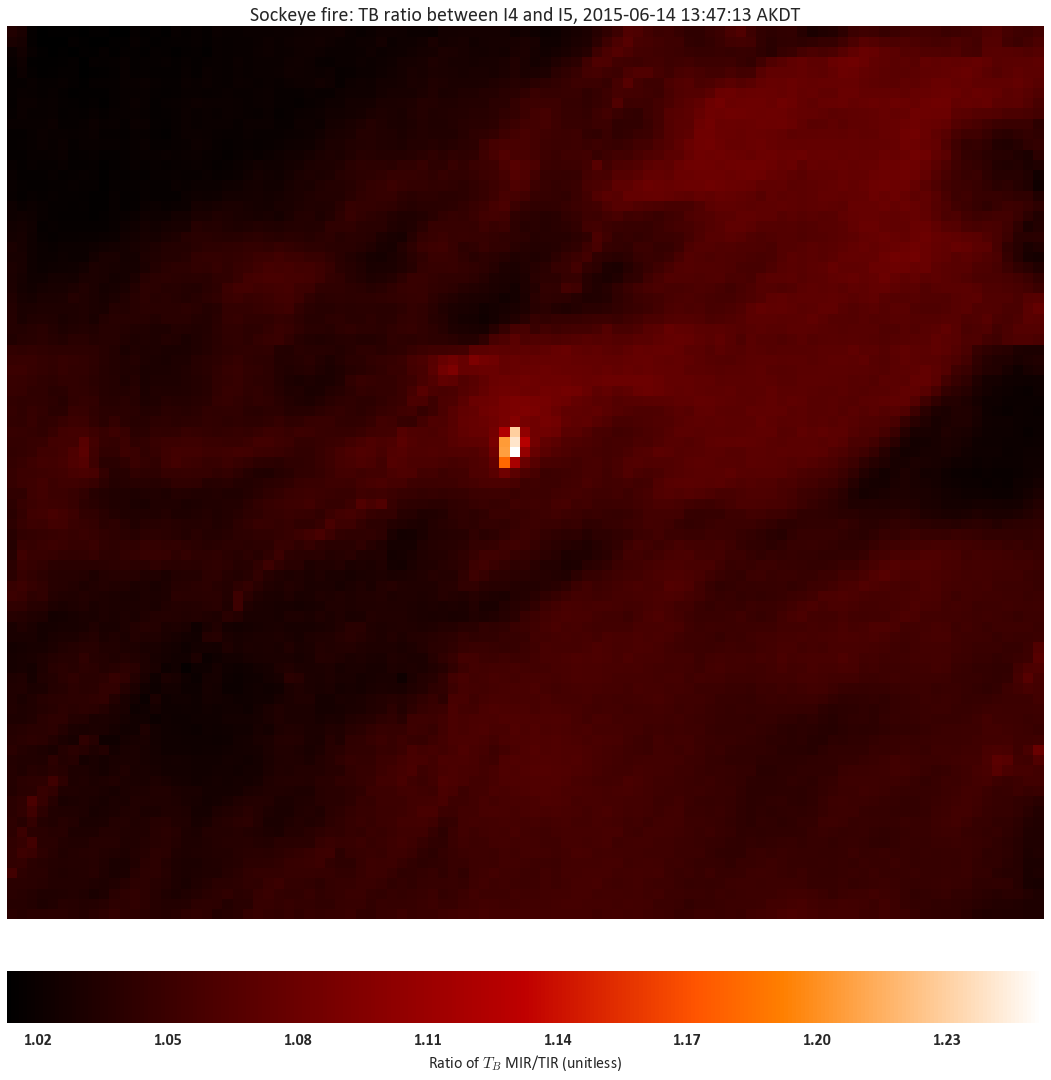

In [94]:
# fourth plot: ratio
plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  plotraster4 / plotraster5
plotraster45 = np.delete(plotraster45, skiprows, 0)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
dataplot = ax1.pcolormesh(np.fliplr(plotraster45))
ax1.set_aspect('equal')
ax1.set_xlim(0, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()
cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label("Ratio of $T_B$ MIR/TIR (unitless)")
ax1.set_title('Sockeye fire: TB ratio between I4 and I5, {}'.format(datestamp))
plt.show()


In [69]:
reload(vif)

<module 'viirsifire' from '../firedetection/viirsifire.py'>

It's day


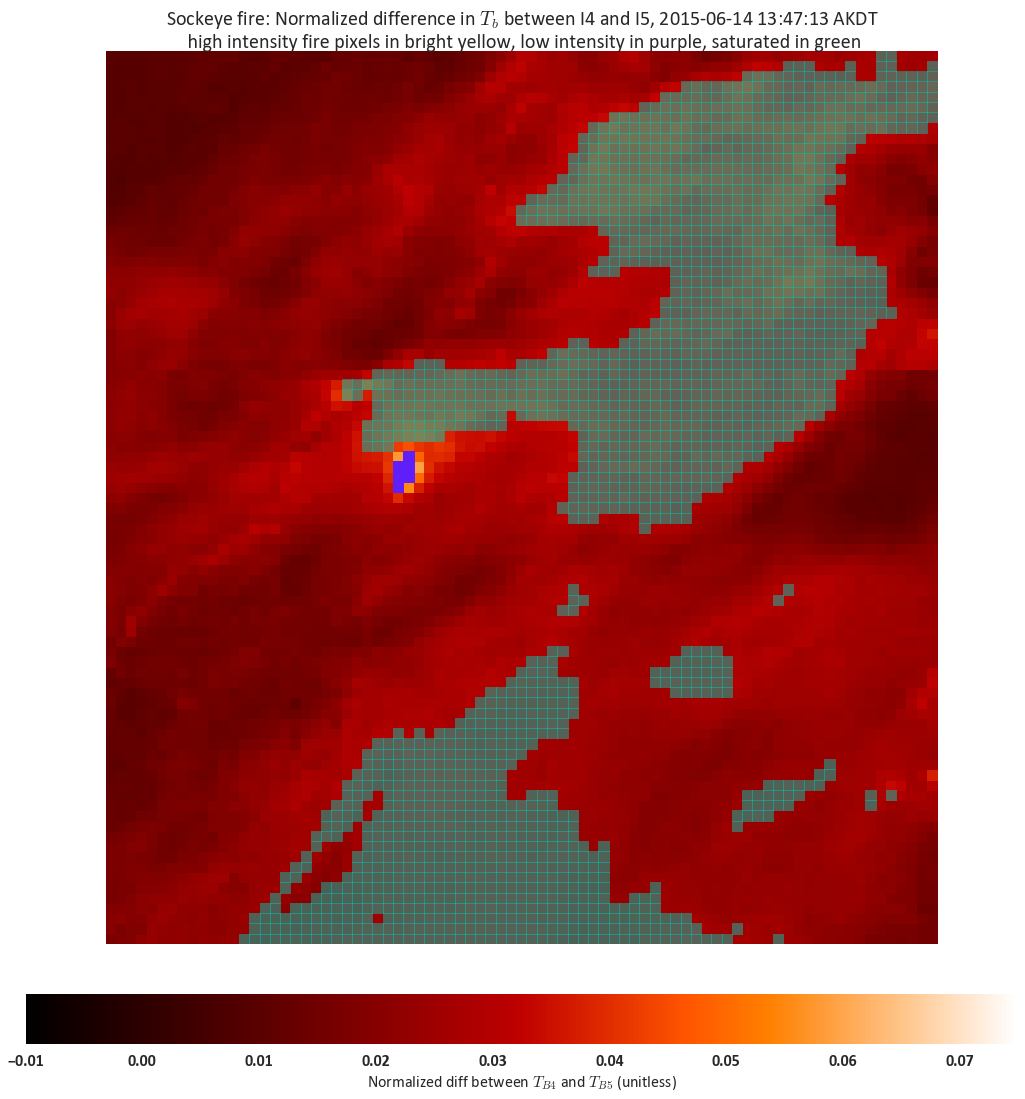

In [97]:
# sith plot: masked over normalized difference or TB4
MASK = True
PLOTB4 = False

plotraster4 = np.delete(rasterlist[0], skiprows, 0)
plotraster5 = np.delete(rasterlist[1], skiprows, 0)
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
pixq4 = np.delete(pixelq4, skiprows, 0)
pixq5 = np.delete(pixelq5, skiprows, 0)


scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, skiprows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, skiprows, 0)


cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

if PLOTB4:
    titlestr1 = "Sockeye fire: $T_b$ from band I4"
else:
    titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

if MASK:
#    duplicatecondition = (skips == 1.)

    if nightscene:
        print("It's night")
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))
        cloudcondition = (plotraster5 < 265.)
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(~cloudcondition, hotcondition)
        warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
        warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
        warmcondition = np.logical_and(~cloudcondition, warmcondition)
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265
        )

    else:
        print("It's day")
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
#        anomalouscondition = np.logical_and(
#            ~duplicatecondition, anomalouscondition)
        
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(
            np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
        hotcondition = np.logical_and(
            hotcondition, ~anomalouscondition)
#        hotcondition = np.logical_and(
#            ~duplicatecondition, hotcondition)
        

        warmcondition = np.logical_or(
            plotraster45 >= 0.02, np.logical_and(
                plotraster45 >= 0.015, plotraster5 >= 312))
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            warmcondition, ~anomalouscondition)
        warmcondition = np.logical_and(
            warmcondition, ~hotcondition)
#        warmcondition = np.logical_and(
#            ~duplicatecondition, warmcondition)

        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),)
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
    
    plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
        titlestr1, datestamp)
else:
    plottitle = '{}, {}'.format(titlestr1, datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

if PLOTB4:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370) 
    cbarlabel = "$T_B$ in $K$"
else:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=-.01, vmax=0.075)   
    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"


if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(20, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label(cbarlabel)

plt.show()

In [98]:
anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()

6

In [106]:
for ii, jj in np.argwhere(warmcondition):
    print(plotraster4[ii, jj], plotraster5[ii, jj], plotraster45[ii, jj])

321.591 272.418 0.0827806
348.411 278.192 0.112062
331.782 274.963 0.0936454
346.598 279.593 0.107005
330.232 274.075 0.092927
333.236 271.099 0.102819


In [101]:
plotraster4[44, 52]

321.59082

It's night


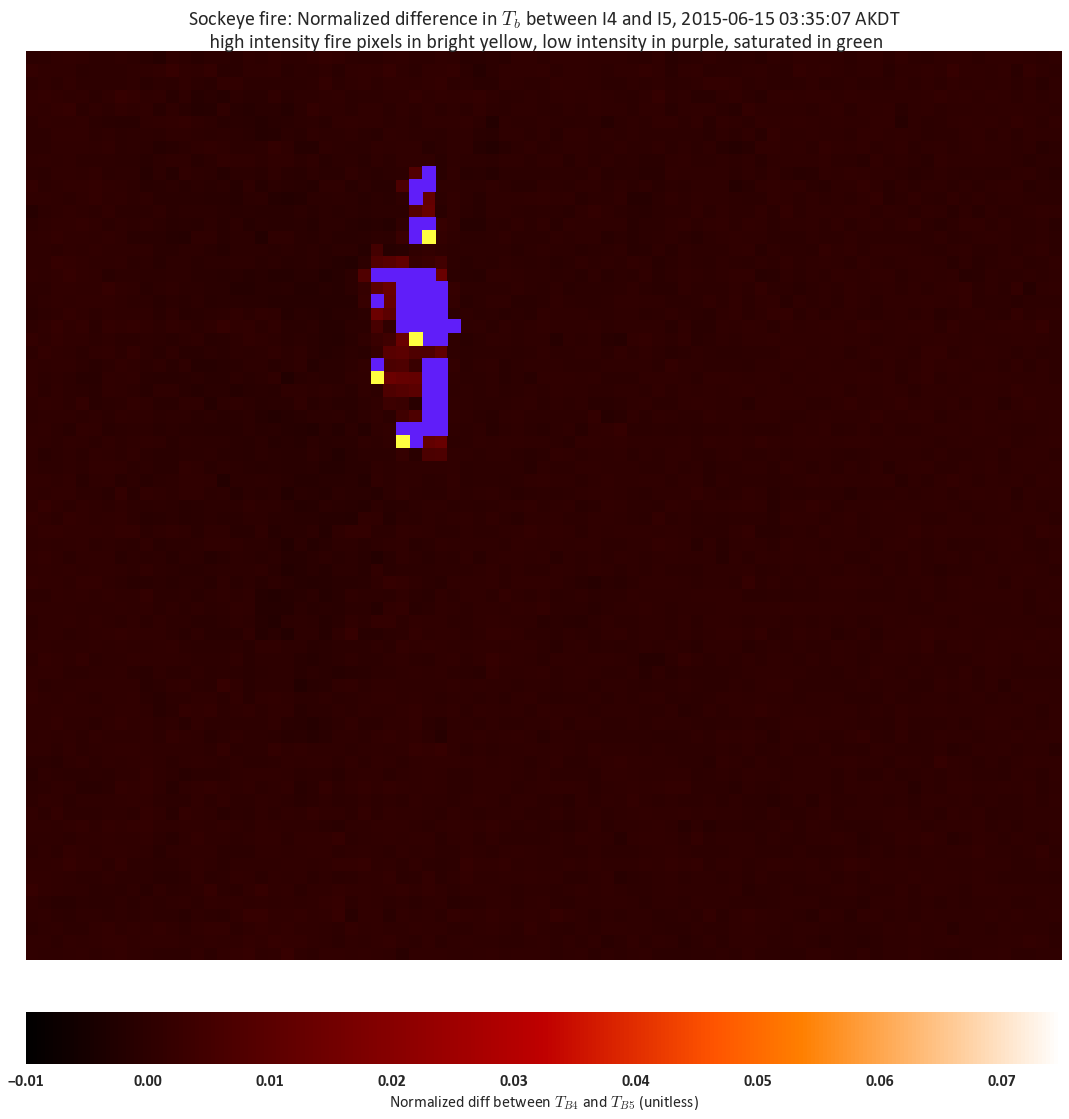

In [71]:
# sith plot: masked over normalized difference or TB4
MASK = True
PLOTB4 = False

plotraster4 = np.delete(rasterlist[0], skiprows, 0)
plotraster5 = np.delete(rasterlist[1], skiprows, 0)
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
pixq4 = np.delete(pixelq4, skiprows, 0)
pixq5 = np.delete(pixelq5, skiprows, 0)


scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, skiprows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, skiprows, 0)


cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

if PLOTB4:
    titlestr1 = "Sockeye fire: $T_b$ from band I4"
else:
    titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

if MASK:

    if nightscene:
        print("It's night")

        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=False)
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265
        )

    else:
        print("It's day")
        anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, daytime=True)

        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),)
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
    
    plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
        titlestr1, datestamp)
else:
    plottitle = '{}, {}'.format(titlestr1, datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

if PLOTB4:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370) 
    cbarlabel = "$T_B$ in $K$"
else:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=-.01, vmax=0.075)   
    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"


if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(20, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label(cbarlabel)

plt.show()

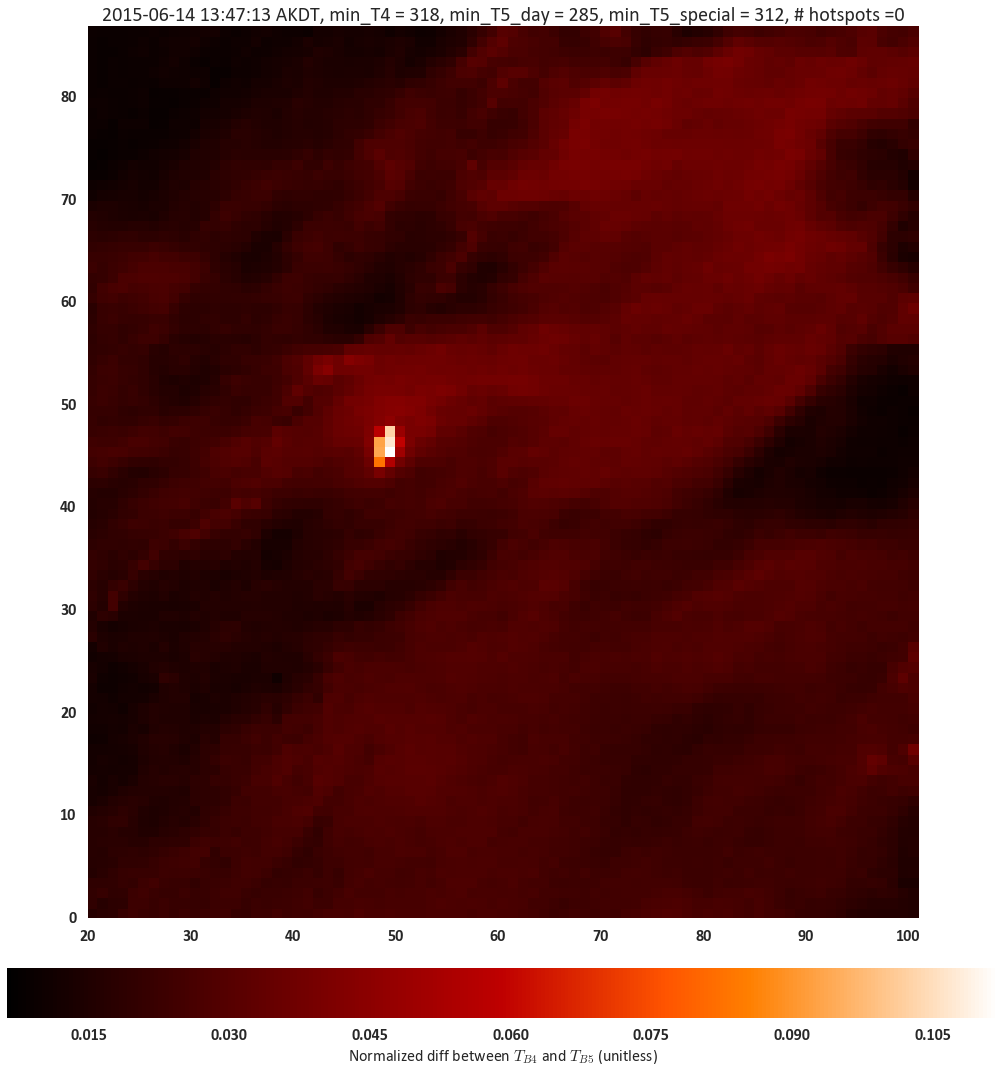

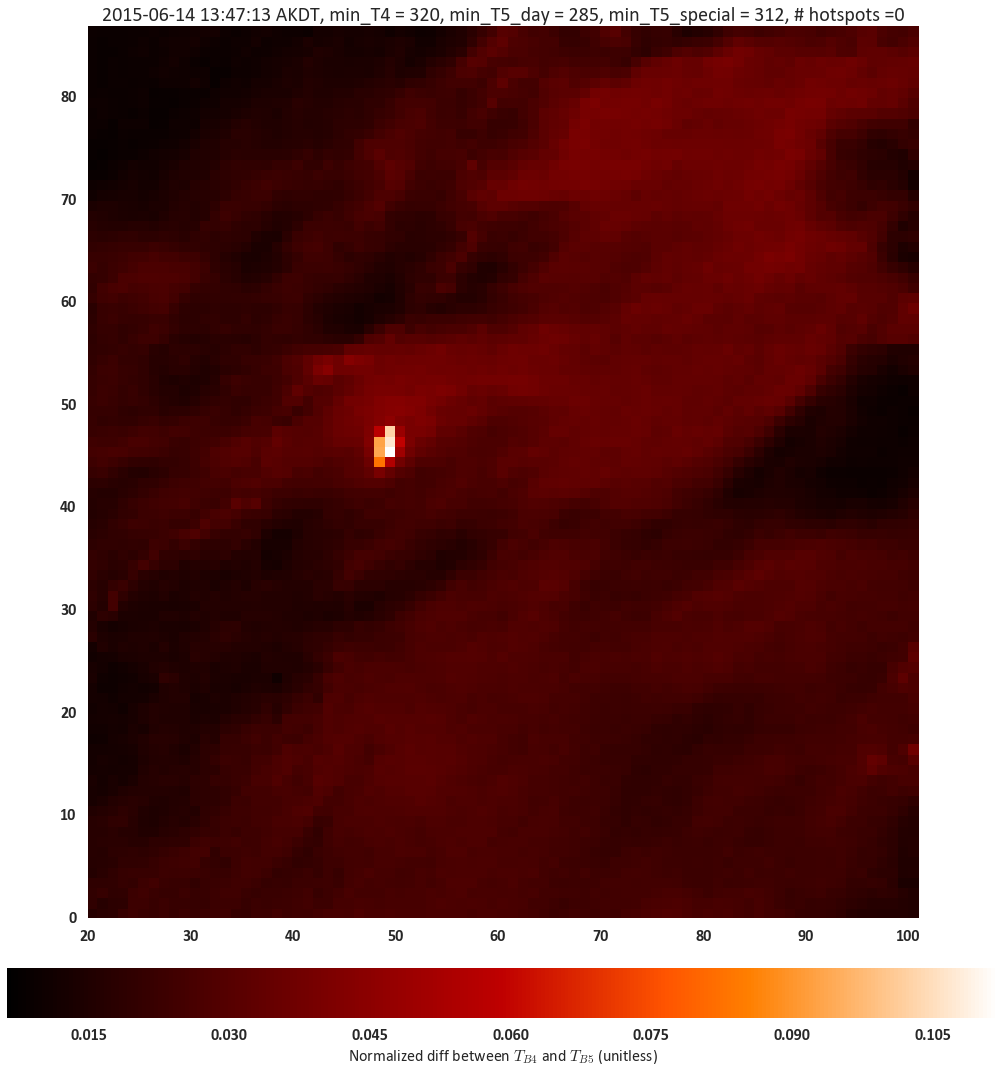

In [40]:
# sith plot: masked over normalized difference or TB4

plotraster4 = np.delete(rasterlist[0], skiprows, 0)
plotraster5 = np.delete(rasterlist[1], skiprows, 0)
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
pixq4 = np.delete(pixelq4, skiprows, 0)
pixq5 = np.delete(pixelq5, skiprows, 0)

scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, skiprows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, skiprows, 0)

cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

#titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

for mint4 in range(318, 321, 2):
    mint5_special=312
    mint5_day=285
    anomalouscondition, hotcondition, warmcondition = vif.getfireconditions_fromrasters(
            plotraster4, plotraster5, pixq4, pixq5, 
            mint4=mint4, mint5_special=mint5_special, mint5_day=mint5_day)

    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    numdetections = anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()
    #plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
    #    titlestr1, datestamp)
    plottitle = '{}, min_T4 = {}, min_T5_day = {}, min_T5_special = {}, # hotspots ={}'.format(
        datestamp, mint4, mint5_day, mint5_special, numdetections)

    fig1 = plt.figure(1, figsize=(15, 15))
    ax1 = fig1.add_subplot(111)
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    ax1.grid(False)

    dataplot = ax1.pcolormesh(np.fliplr(plotraster45))   
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)

    ax1.set_title(plottitle)
    ax1.set_aspect('equal')
    ax1.set_xlim(20, plotraster.shape[1])
    ax1.set_ylim(0, plotraster.shape[0])
    plt.tight_layout()

    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"
    cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
    cbar.set_label(cbarlabel)

    plt.show()



In [56]:
fig1.savefig("/Users/cwaigl/Desktop/testfires_after.png", dpi=300)


In [55]:
anomalouscondition.sum() + hotcondition.sum() + warmcondition.sum()

116

In [111]:
skiprows

array([ 4,  5,  6,  7,  8,  9, 10, 36, 37, 38, 39, 40, 41, 42, 68, 69, 70,
       71, 72, 73, 74])

In [53]:
# sith plot: masked over normalized difference or TB4
MASK = True
PLOTB4 = False

plotraster4 = rasterlist[0]
plotraster5 = rasterlist[1]
plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)

scene = raster.VIIRSHDF5(testpath01)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster1 = testdat*mult + add
plotraster1 = np.delete(plotraster1, excluderows, 0)

scene = raster.VIIRSHDF5(testpath02)
bandname = scene.bandname
testdat = scene.dataobj['All_Data'][bandname]['Reflectance'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['ReflectanceFactors'][:]
plotraster2 = testdat*mult + add
plotraster2 = np.delete(plotraster2, excluderows, 0)


cmap4 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'turquoise']))

if PLOTB4:
    titlestr1 = "Sockeye fire: $T_b$ from band I4"
else:
    titlestr1 = "Sockeye fire: Normalized difference in $T_b$ between I4 and I5"

if MASK:
    duplicatecondition = (np.delete(skips, excluderows, 0) == 1.)

    if nightscene:
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))
        cloudcondition = (plotraster5 < 265.)
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(~cloudcondition, hotcondition)
        warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
        warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
        warmcondition = np.logical_and(~cloudcondition, warmcondition)
        cloudcondition = np.logical_and(
            plotraster4 < 295, plotraster5 < 265
        )

    else:
        # it's day 
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        anomalouscondition = np.logical_and(
            ~duplicatecondition, anomalouscondition)
        
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(
            np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
        hotcondition = np.logical_and(
            hotcondition, ~anomalouscondition)
        hotcondition = np.logical_and(
            ~duplicatecondition, hotcondition)
        

        warmcondition = np.logical_or(
            plotraster45 >= 0.02, np.logical_and(
                plotraster45 >= 0.015, plotraster5 >= 312))
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            ~duplicatecondition, warmcondition)

        cloudcondition = np.logical_or(
            plotraster5 < 265, 
            np.logical_and(plotraster1 + plotraster2 > 0.9, plotraster5 < 295))
        cloudcondition = np.logical_or(
            cloudcondition,
            np.logical_and(plotraster1 + plotraster2 > 0.7, plotraster5 < 285),)
    cloudmask = np.ma.masked_where(
        ~cloudcondition, np.ones(plotraster5.shape))
    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))

    cmap1 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'canary yellow']))
    cmap2 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))
    
    plottitle = '{}, {}\n high intensity fire pixels in bright yellow, low intensity in purple, saturated in green'.format(
        titlestr1, datestamp)
else:
    plottitle = '{}, {}'.format(titlestr1, datestamp)

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid(False)

if PLOTB4:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster4), vmin=280, vmax=370) 
    cbarlabel = "$T_B$ in $K$"
else:
    dataplot = ax1.pcolormesh(np.fliplr(plotraster45), vmin=0.0, vmax=0.09)   
    cbarlabel = "Normalized diff between $T_{B4}$ and $T_{B5}$ (unitless)"


if MASK:
    dataplot3 = ax1.pcolormesh(np.fliplr(plotraster_cool), cmap=cmap2, vmin=0, vmax=1)
    dataplot2 = ax1.pcolormesh(np.fliplr(plotraster45_masked), cmap=cmap1, vmin=0, vmax=1)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    cloudplot = ax1.pcolormesh(np.fliplr(cloudmask), cmap=cmap4, alpha=0.5, vmin=0, vmax=1)

ax1.set_title(plottitle)
ax1.set_aspect('equal')
ax1.set_xlim(20, plotraster.shape[1])
ax1.set_ylim(0, plotraster.shape[0])
plt.tight_layout()

cbar = fig1.colorbar(dataplot, orientation='horizontal', pad=cbarpad, fraction=cbarfraction)
cbar.set_label(cbarlabel)

plt.show()



ValueError: operands could not be broadcast together with shapes (575,1701) (1277,1701) 

In [63]:
fn = 'viirscloudmask02NormDiff.png'
fig1.savefig(os.path.join(outdir, fn), bb_inches='tight', dpi=200)

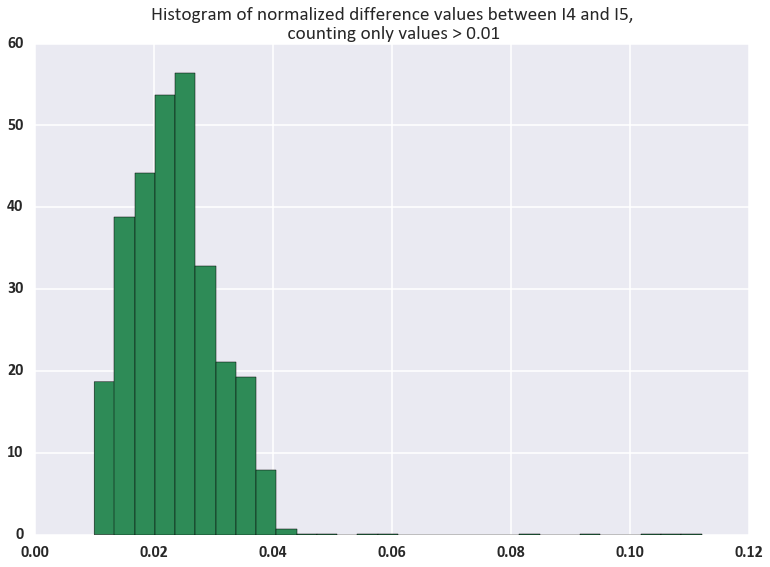

In [106]:
normdiffs = plotraster45.flatten()
values = normdiffs[normdiffs>0.01]
n, bins, patches = plt.hist(values, 30, normed=1, facecolor='seagreen') 
plt.title("Histogram of normalized difference values between I4 and I5,\n counting only values > 0.01")

In [37]:
i4sc = raster.VIIRSHDF5(i04paths[IDX])
i5sc = raster.VIIRSHDF5(i05paths[IDX])
imin, imax, jmin, jmax = i4sc.crop(sample_lat, sample_lon, 125, 125)

ascendingnode = True
middlelatdelta = i4sc.lats[-1, 3200] - i4sc.lats[0, 3200]
if middlelatdelta < 0:
    ascendingnode = False 
i4sc.ascendingnode = ascendingnode
skips = get_skips(i4sc, imin=imin, imax=imax, jmin=jmin, jmax=jmax)

lons = i4sc.lons[imin:imax, jmin:jmax]
lats = i4sc.lats[imin:imax, jmin:jmax]

mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
i4tb = i4tb * mult + add
mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
i5tb = i5tb * mult + add
pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]

nightscene = True
zenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")

i45 =  (i4tb - i5tb) / (i4tb + i5tb)

datestamp = vt.getdatestamp_AKDT(i4sc)

# conditions
duplicatecondition = (skips == 1.)

if nightscene:
    print("Night scene")
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, i4tb < 360),
        np.logical_and(pixq5 == 0, i4tb == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)
    cloudcondition = (i5tb < 265.)
    hotcondition = (i45 >= 0.05)
    hotcondition = np.logical_and(~cloudcondition, hotcondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)
    warmcondition = np.logical_and(~hotcondition, i45 >= 0.015)
    warmcondition = np.logical_and(i4tb > 290, warmcondition)
    warmcondition = np.logical_and(~cloudcondition, warmcondition)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)
else:
# it's day 
    print("Day scene")
    anomalouscondition = np.logical_or(
        np.logical_and(pixq4 == 193, i4tb < 360),
        np.logical_and(pixq5 == 0, i4tb == 367.))
    anomalouscondition = np.logical_and(
        ~duplicatecondition, anomalouscondition)

    hotcondition = (i45 >= 0.05)
    hotcondition = np.logical_and(
        np.logical_and(hotcondition, i4tb > 320), i5tb > 290)
    hotcondition = np.logical_or(
        hotcondition, anomalouscondition)
    hotcondition = np.logical_and(
        ~duplicatecondition, hotcondition)

    warmcondition = np.logical_or(
        i45 >= 0.02, np.logical_and(
            i45 >= 0.015, i5tb >= 308))
    warmcondition = np.logical_and(
        warmcondition, i4tb > 320)
    warmcondition = np.logical_and(
        ~duplicatecondition, warmcondition)

print(np.where(warmcondition))
print(np.where(hotcondition))

Day scene
(array([ 24,  96,  97,  97,  98, 100, 100, 101, 101, 101, 103, 104, 105,
       106, 106, 106, 106, 107, 107, 107, 107, 108, 109, 110, 118, 118,
       118, 119, 119, 119, 120, 120, 120, 121, 122, 122, 123, 123, 124,
       124, 124, 124, 124, 125]), array([ 23, 134, 132, 134, 132, 133, 134, 132, 133, 134, 129, 130, 131,
       130, 131, 132, 133, 125, 130, 131, 132, 125, 133, 129, 128, 130,
       131, 124, 130, 131, 129, 130, 131, 130, 129, 130, 129, 130, 124,
       126, 127, 128, 129, 124]))
(array([ 96,  97, 101, 107, 108, 109, 110, 118, 118, 118, 119, 119, 121,
       122, 123, 124]), array([134, 132, 133, 125, 125, 133, 129, 128, 130, 131, 124, 131, 130,
       130, 130, 129]))


In [38]:
i4sc.meta

{u'Data_Product': {u'AggregateBeginningDate': u'20150615',
  u'AggregateBeginningGranuleID': u'NPP001150817578',
  u'AggregateBeginningOrbitNumber': u'18821',
  u'AggregateBeginningTime': u'230918.352825Z',
  u'AggregateEndingDate': u'20150615',
  u'AggregateEndingGranuleID': u'NPP001150817578',
  u'AggregateEndingOrbitNumber': u'18821',
  u'AggregateEndingTime': u'231042.528429Z',
  u'Instrument_Short_Name': u'VIIRS',
  u'N_Collection_Short_Name': u'VIIRS-I4-SDR',
  u'N_Dataset_Type_Tag': u'SDR',
  u'N_Processing_Domain': u'OPS'},
 u'Distributor': u'cspp',
 u'Mission_Name': u'NPP',
 u'N_Dataset_Source': u'all-',
 u'N_GEO_Ref': u'GITCO_npp_d20150615_t2309183_e2310425_b18821_c20150615233131914882_cspp_dev.h5',
 u'N_HDF_Creation_Date': u'20150615',
 u'N_HDF_Creation_Time': u'233134.583144Z',
 u'Number_of_Data_Products': u'1',
 u'Platform_Short_Name': u'NPP'}

NameError: name 'i04paths' is not defined

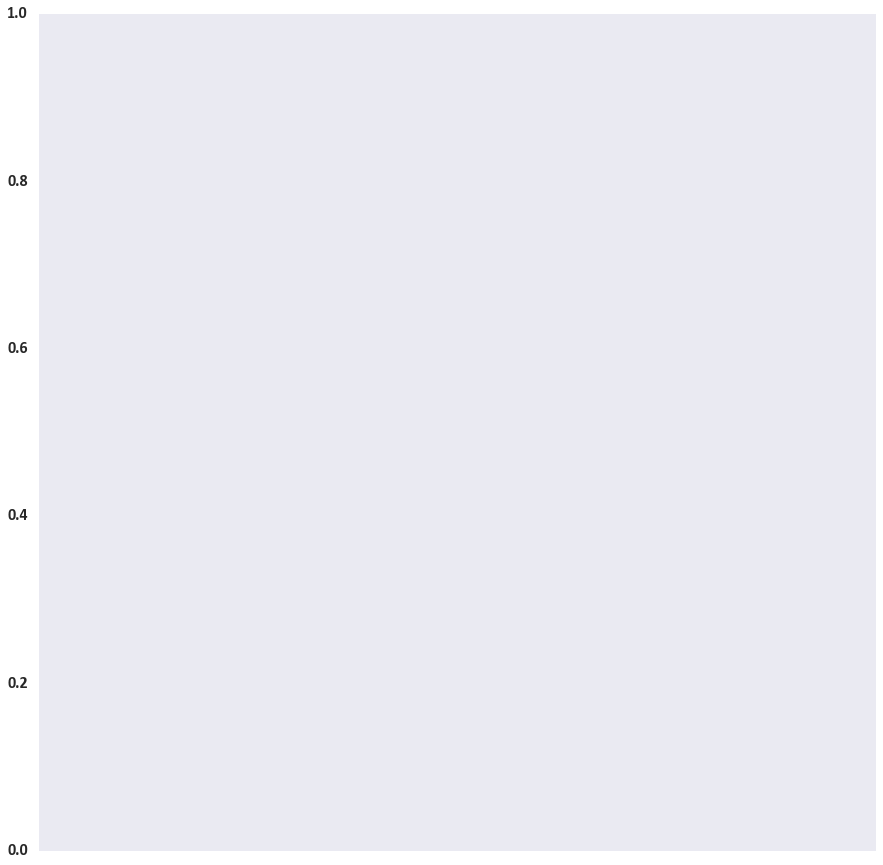

In [105]:
SAVEFIG = False
sns.set_context("poster")

fig1 = plt.figure(1, figsize=(15, 15))
ax1 = fig1.add_subplot(111)
ax1.set_xticklabels([])
ax1.grid(False) 

i4sc = raster.VIIRSHDF5(i04paths[IDX])
i5sc = raster.VIIRSHDF5(i05paths[IDX])
imin, imax, jmin, jmax = i4sc.crop(sample_lat, sample_lon, 125, 125)
pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]
# find row indices where no data present
excluderows = np.where((pixq4[:, 0] == 2) | (pixq4[:, -1] == 2) )
pixq4 = np.delete(pixq4, excluderows, 0)
pixq5 = np.delete(pixq5, excluderows, 0)
mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
i4tb_scaled = i4tb * mult + add
plotraster4 = np.delete(i4tb_scaled, excluderows, 0)
mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
i5tb_scaled = i5tb * mult + add
plotraster5 = np.delete(i5tb_scaled, excluderows, 0)

ascendingnode = True
middlelatdelta = i4sc.lats[-1, 3200] - i4sc.lats[0, 3200]
if middlelatdelta < 0:
    ascendingnode = False 
i4sc.ascendingnode = ascendingnode
skips = get_skips(i4sc, imin=imin, imax=imax, jmin=jmin, jmax=jmax)
skips = np.delete(skips, excluderows, 0)

nightscene = True
zenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
if np.all(zenithangles <= 90.):
    nightscene = False
elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
    print("WARNING: mixed scene with zenith angles above and below 90°.")

plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['canary yellow']))
cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['purplish blue']))
cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['kelly green']))

lons = i4sc.lons[imin:imax, jmin:jmax]
lats = i4sc.lats[imin:imax, jmin:jmax]
datestamp = vt.getdatestamp_AKDT(i4sc)

if MASK:

    duplicatecondition = (skips == 1.)
    if nightscene:
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        anomalouscondition = np.logical_and(
            ~duplicatecondition, anomalouscondition)
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))
        cloudcondition = (plotraster5 < 265.)
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(~cloudcondition, hotcondition)
        hotcondition = np.logical_and(
            ~duplicatecondition, hotcondition)
        warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
        warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
        warmcondition = np.logical_and(~cloudcondition, warmcondition)
        warmcondition = np.logical_and(
            ~duplicatecondition, warmcondition)

    else:
        # it's day 
        anomalouscondition = np.logical_or(
            np.logical_and(pixq4 == 193, plotraster4 < 360),
            np.logical_and(pixq5 == 0, plotraster4 == 367.))
        anomalouscondition = np.logical_and(
            ~duplicatecondition, anomalouscondition)
        
        hotcondition = (plotraster45 >= 0.05)
        hotcondition = np.logical_and(
            np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
        hotcondition = np.logical_or(
            hotcondition, anomalouscondition)
        hotcondition = np.logical_and(
            ~duplicatecondition, hotcondition)

        warmcondition = np.logical_or(
            plotraster45 >= 0.02, np.logical_and(
                plotraster45 >= 0.015, plotraster5>=312))
        warmcondition = np.logical_and(
            warmcondition, plotraster4 > 320)
        warmcondition = np.logical_and(
            ~duplicatecondition, warmcondition)

    plotraster45_masked = np.ma.masked_where(
        ~hotcondition, np.ones(plotraster45.shape))
    plotraster_cool = np.ma.masked_where(
        ~warmcondition, np.ones(plotraster45.shape))
    plotraster45_anomalousmasked = np.ma.masked_where(
        ~anomalouscondition, np.ones(plotraster45.shape))


# map plot
fig1 = plt.figure(1, figsize=(20, 15))
ax1 = fig1.add_subplot(111)
# mapbase
mm = vt.generate_willowbase(zoom_in=True, resolution='i')
xx, yy = mm(np.delete(lons, excluderows, 0), np.delete(lats, excluderows, 0))
# data 
#dataplt = mm.pcolormesh(xx, yy, plotraster4, edgecolors='None',vmin=280, vmax=370, zorder=2)
dataplot3 = mm.pcolormesh(xx, yy, plotraster_cool, edgecolors='None', cmap=cmap2, vmin=0, vmax=1, zorder=3)
dataplot2 = mm.pcolormesh(xx, yy, plotraster45_masked, edgecolors='None', cmap=cmap1, vmin=0, vmax=1, zorder=3)
dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
# scale 
mm.drawmapscale(-150.37, 61.95, -150.1, 61.85, 10, barstyle="fancy", fontsize=22, zorder=5)

#cbar = mm.colorbar(dataplt, location='bottom', pad="5%")
mm.readshapefile(
    sideroads, 
    'sideroads', 
    color="grey", linewidth=2, zorder=5)

ax1.set_title(
    'Sockeye fire: High- and low-intensity (bright yellow and purple, respectively) \n burning areas from VIIRS I-band data, {}'.format(datestamp))
if SAVEFIG:
    datestamp = vt.getdatestamp_AKDT(i4sc, spaces=False)
    filename = 'Sockeye_hotspot_map_{}.png'.format(datestamp)
    outpath = os.path.join(productdir, filename)
    fig1.savefig(outpath, dpi=200, bbox_inches='tight')
plt.show()



In [149]:
print(sum(sum(hotcondition)), sum(sum(warmcondition)))
print(np.where(warmcondition))
print(np.where(hotcondition))

1 5
(array([145, 145, 145, 146, 146]), array([121, 122, 123, 121, 123]))
(array([146]), array([122]))


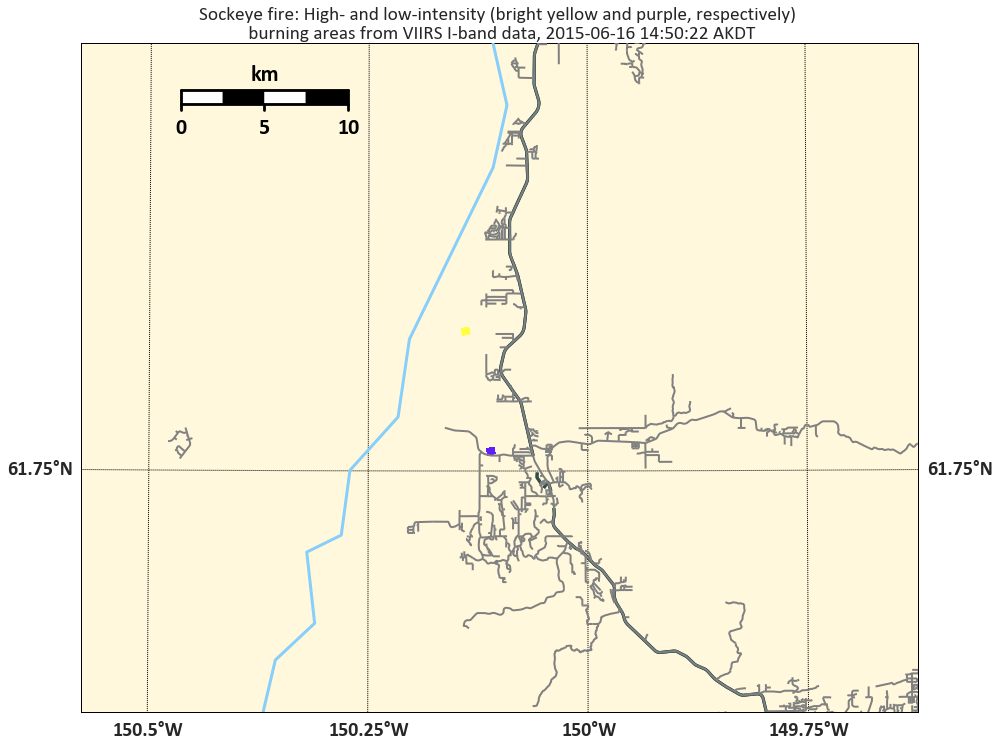

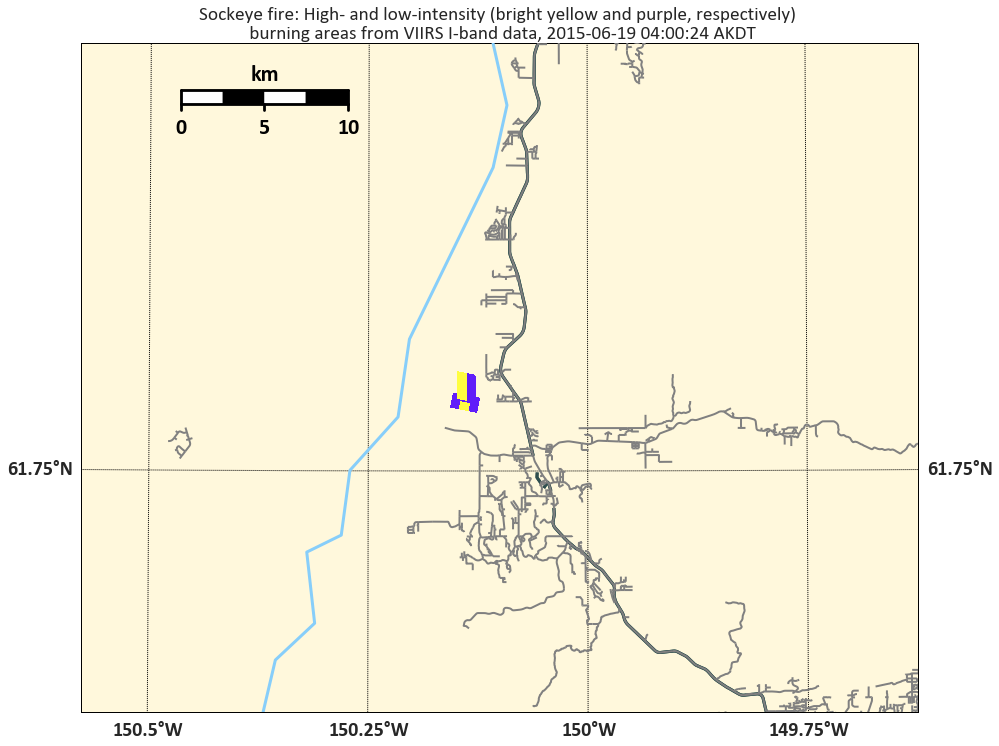

In [131]:
SAVEFIG = True
sns.set_context("poster")

for scindex in range(9, 11):

    fig1 = plt.figure(1, figsize=(15, 15))
    ax1 = fig1.add_subplot(111)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.grid(False) 

    i4sc = raster.VIIRSHDF5(i04paths[scindex])
    i5sc = raster.VIIRSHDF5(i05paths[scindex])
    imin, imax, jmin, jmax = i4sc.crop(sample_lat, sample_lon, 125, 125)
    pixq4 = i4sc.pixelquality[imin:imax, jmin:jmax]
    pixq5 = i5sc.pixelquality[imin:imax, jmin:jmax]
    # find row indices where no data present
    excluderows = np.where((pixq4[:, 0] == 2) | (pixq4[:, -1] == 2) )
    pixq4 = np.delete(pixq4, excluderows, 0)
    pixq5 = np.delete(pixq5, excluderows, 0)
    mult, add = i4sc.I4['BrightnessTemperatureFactors'][:]
    i4tb = i4sc.I4['BrightnessTemperature'][imin:imax, jmin:jmax]
    i4tb_scaled = i4tb * mult + add
    plotraster4 = np.delete(i4tb_scaled, excluderows, 0)
    mult, add = i5sc.I5['BrightnessTemperatureFactors'][:]
    i5tb = i5sc.I5['BrightnessTemperature'][imin:imax, jmin:jmax]
    i5tb_scaled = i5tb * mult + add
    plotraster5 = np.delete(i5tb_scaled, excluderows, 0)

    nightscene = True
    zenithangles = i4sc.geodata['SolarZenithAngle'][imin:imax, jmin:jmax]
    if np.all(zenithangles <= 90.):
        nightscene = False
    elif (np.any(zenithangles > 90.) & np.any(zenithangles <= 90.)):
        print("WARNING: mixed scene with zenith angles above and below 90°.")

    plotraster45 =  (plotraster4 - plotraster5) / (plotraster4 + plotraster5)
    cmap1 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['canary yellow']))
    cmap2 =  matplotlib.colors.ListedColormap(sns.xkcd_palette(['purplish blue']))
    cmap3 = matplotlib.colors.ListedColormap(sns.xkcd_palette(['white', 'kelly green']))

    lons = i4sc.lons[imin:imax, jmin:jmax]
    lats = i4sc.lats[imin:imax, jmin:jmax]
    datestamp = vt.getdatestamp_AKDT(i4sc)

    if MASK:

        if nightscene:
            anomalouscondition = np.logical_or(
                np.logical_and(pixq4 == 193, plotraster4 < 360),
                np.logical_and(pixq5 == 0, plotraster4 == 367.))
            plotraster45_anomalousmasked = np.ma.masked_where(
                ~anomalouscondition, np.ones(plotraster45.shape))
            cloudcondition = (plotraster5 < 265.)
            hotcondition = (plotraster45 >= 0.05)
            hotcondition = np.logical_and(~cloudcondition, hotcondition)
            warmcondition = np.logical_and(~hotcondition, plotraster45 >= 0.015)
            warmcondition = np.logical_and(plotraster4 > 290, warmcondition)
            warmcondition = np.logical_and(~cloudcondition, warmcondition)

        else:
            # it's day 
            anomalouscondition = np.logical_or(
                np.logical_and(pixq4 == 193, plotraster4 < 360),
                np.logical_and(pixq5 == 0, plotraster4 == 367.))

            hotcondition = (plotraster45 >= 0.05)
            hotcondition = np.logical_and(
                np.logical_and(hotcondition, plotraster4 > 320), plotraster5 > 290)
            hotcondition = np.logical_or(
                hotcondition, anomalouscondition)

            warmcondition = np.logical_or(
                plotraster45 >= 0.02, np.logical_and(
                    plotraster45 >= 0.015, plotraster5>=308))
            warmcondition = np.logical_and(
                warmcondition, plotraster4 > 320)

        plotraster45_masked = np.ma.masked_where(
            ~hotcondition, np.ones(plotraster45.shape))
        plotraster_cool = np.ma.masked_where(
            ~warmcondition, np.ones(plotraster45.shape))
        plotraster45_anomalousmasked = np.ma.masked_where(
            ~anomalouscondition, np.ones(plotraster45.shape))


    # map plot
    fig1 = plt.figure(1, figsize=(20, 15))
    ax1 = fig1.add_subplot(111)
    # mapbase
    mm = vt.generate_willowbase(zoom_in=True, resolution='i')
    xx, yy = mm(np.delete(lons, excluderows, 0), np.delete(lats, excluderows, 0))
    # data 
    #dataplt = mm.pcolormesh(xx, yy, plotraster4, edgecolors='None',vmin=280, vmax=370, zorder=2)
    dataplot3 = mm.pcolormesh(xx, yy, plotraster_cool, edgecolors='None', cmap=cmap2, vmin=0, vmax=1, zorder=3)
    dataplot2 = mm.pcolormesh(xx, yy, plotraster45_masked, edgecolors='None', cmap=cmap1, vmin=0, vmax=1, zorder=3)
    dataplot4 = ax1.pcolormesh(np.fliplr(plotraster45_anomalousmasked), cmap=cmap3, vmin=0, vmax=1)
    # scale 
    mm.drawmapscale(-150.37, 61.95, -150.1, 61.85, 10, barstyle="fancy", fontsize=22, zorder=5)

    #cbar = mm.colorbar(dataplt, location='bottom', pad="5%")
    mm.readshapefile(
        sideroads, 
        'sideroads', 
        color="grey", linewidth=2, zorder=5)

    ax1.set_title(
        'Sockeye fire: High- and low-intensity (bright yellow and purple, respectively) \n burning areas from VIIRS I-band data, {}'.format(datestamp))
    if SAVEFIG:
        datestamp = vt.getdatestamp_AKDT(i4sc, spaces=False)
        filename = 'Sockeye_hotspot_map_{}.png'.format(datestamp)
        outpath = os.path.join(productdir, filename)
        fig1.savefig(outpath, dpi=200, bbox_inches='tight')
    plt.show()

In [98]:
reload(vt)

<module 'viirstools' from 'viirstools.py'>

In [48]:
sns.set_context("poster")

## Investigating duplicate data and raster properties

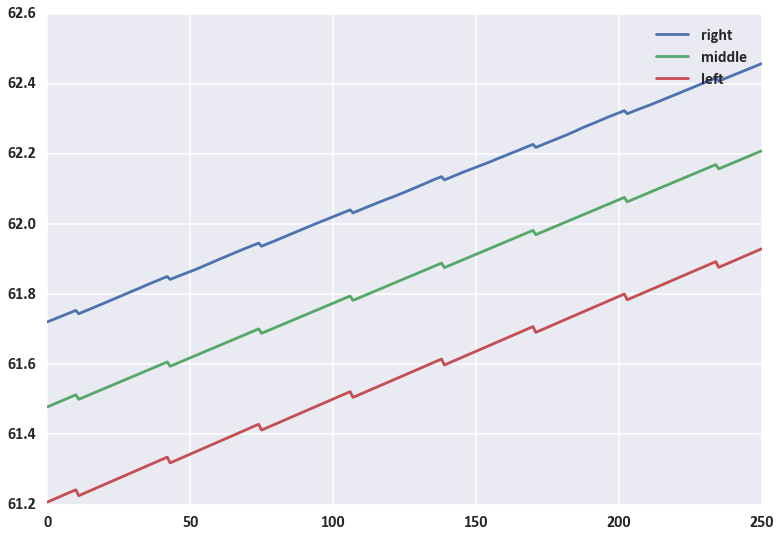

In [54]:
plt.plot(range(imax-imin), testscene04.lats[imin:imax, jmin], label='right')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, (jmax+jmin)//2], label='middle')
plt.plot(range(imax-imin), testscene04.lats[imin:imax, jmax], label='left')
plt.legend()

In [55]:
scene = testscene04
bandname = scene.bandname
testdat4 = scene.dataobj['All_Data'][bandname]['BrightnessTemperature'][imin:imax, jmin:jmax]
mult, add = scene.dataobj['All_Data'][bandname]['BrightnessTemperatureFactors'][:]

#plotraster4 = np.delete(testdat4, excluderows, 0)
testdat4 = testdat4*mult + add
lons = testscene04.lons[imin:imax, jmin:jmax]
lats = testscene04.lats[imin:imax, jmin:jmax]
lons.shape, lats.shape, testdat4.shape

((251, 251), (251, 251), (251, 251))

In [56]:
ascendingnode

True

In [58]:
deltas = lats[:-1, :] - lats[1:, :]
if ascendingnode:
    deltas[deltas > 0] = 0
else:
    deltas[deltas < 0] = 0

right = np.where(deltas[:, 0] == 0)[0]
left = np.where(deltas[:, -1] == 0)[0]
middle = np.where(deltas[:, deltas.shape[1]//2] == 0)[0]

In [66]:
from functools import reduce, partial
zeros = reduce(np.union1d, (right, left, middle))
print(zeros)

[ 10  42  74 106 138 170 202 234]


In [67]:
print(len(lats[:-1, :]))
print(np.max(zeros, axis=0))
print(testscene04.ascendingnode)

250
234
True


In [71]:
def get_skips_by_col(col, zeros=[], length=None, ascending=True):
    if not length:
        length = col.shape[0]
    if len(zeros) == 0:
        return []
    skipindices = []
    outcol = np.zeros(length)
    if length < np.max(np.max(zeros)):
        print("*** ERROR in function get_skips_by_col: index out of range")
        return
    fac = 1.
    if not ascending:
        fac = -1.
    for idx in zeros:
        step = np.argmax(fac*col[idx:] > fac*col[idx])
        if step == 0:
            skipindices.extend(range(idx+1, length))
        else:
            halfstepL = step//2
            if halfstepL > idx:
                halfstepL == idx
            halfstepR = step - halfstepL
            skipindices.extend(range(idx-halfstepL+1, idx+halfstepR))
    outcol[skipindices] = 1.
    return outcol

get_skips_for_lats = partial(get_skips_by_col, zeros=zeros, length=imax-imin)

skips = np.apply_along_axis(get_skips_for_lats, 0, 
    testscene04.lats[imin:imax, jmin:jmax], 
    ascending=testscene04.ascendingnode)
#get_skips_for_lats(lats[:, 1], zeros=zeros, length=lats.shape[0], ascending=True)

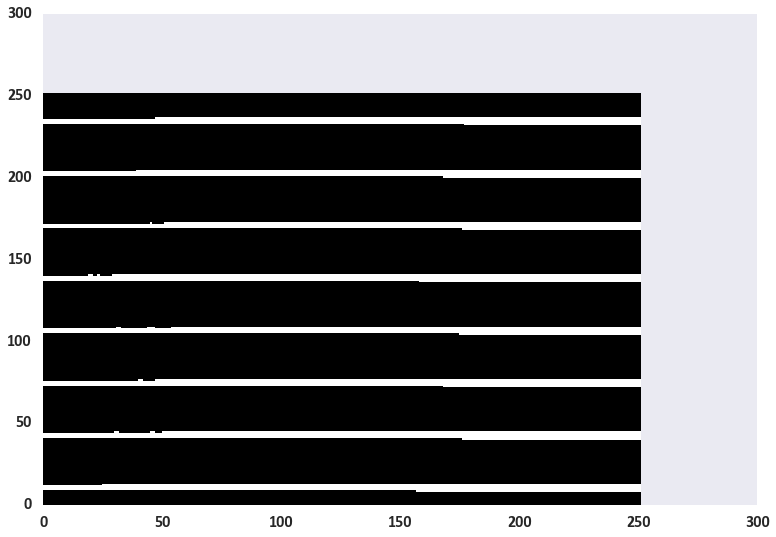

In [72]:
plt.pcolormesh(skips)

<matplotlib.colorbar.Colorbar instance at 0x1214b5cf8>

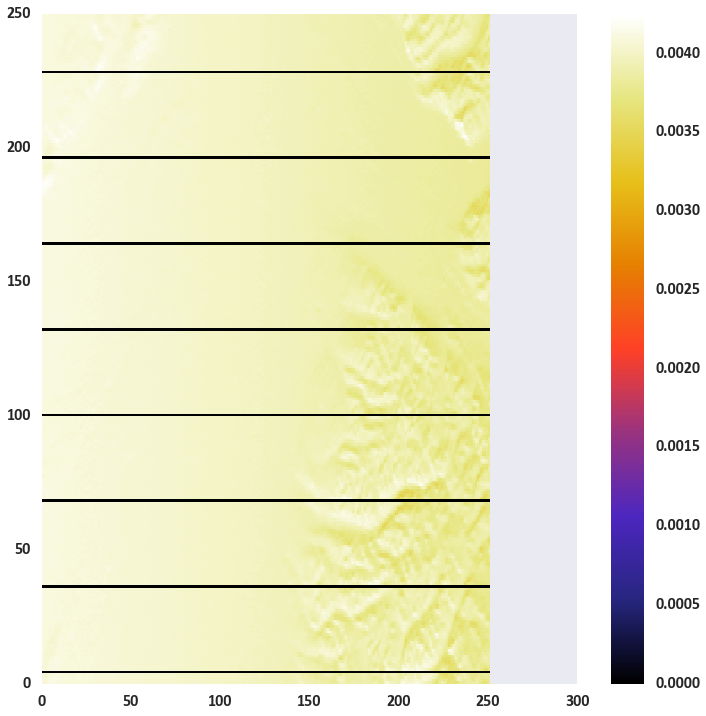

In [26]:
fig1 = plt.figure(1, figsize=(12, 12))
ax1 = fig1.add_subplot(111)
dataplt = plt.pcolormesh(deltas, cmap='CMRmap')
plt.colorbar(dataplt)

<matplotlib.colorbar.Colorbar instance at 0x121428248>

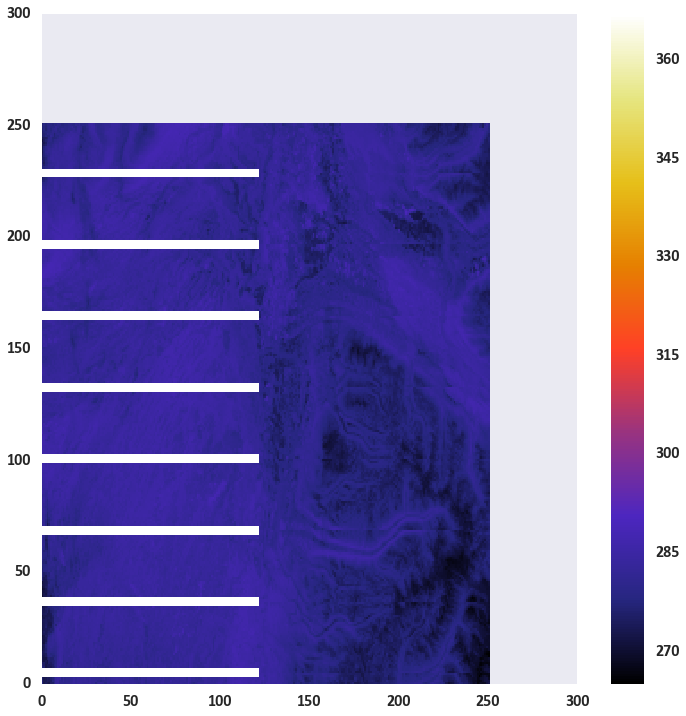

In [27]:
fig1 = plt.figure(1, figsize=(12, 12))
ax1 = fig1.add_subplot(111)
dataplt = plt.pcolormesh(testdat4, cmap='CMRmap')
plt.colorbar(dataplt)

In [28]:
lons_scrub = np.delete(testscene04.lons[imin:imax, jmin:jmax], excluderows, 0)
lats_scrub = np.delete(testscene04.lats[imin:imax, jmin:jmax], excluderows, 0)
testdat4_scrub = np.delete(testdat4, excluderows, 0)

In [29]:
i,j = np.unravel_index(testdat4_scrub.argmax(), testdat4_scrub.shape)
i, j

(183, 204)

In [30]:
testdat4[i, j], lats[i, j], lons[i, j]

(285.09656, 61.592575, -149.3299)

In [31]:
%%timeit
def get_corners_simple(i, j, scene):
    corners = []
    for deli in [1, -1]: 
        for delj in [1, -1]:
            newlon = (scene.lons[i+deli, j+delj] + scene.lons[i, j])/2
            newlat = (scene.lats[i+deli, j+delj] + scene.lats[i, j])/2
            corners.append((newlon, newlat))
    return corners

print(get_corners_simple(i, j, testscene04))

[(-166.78416442871094, 63.358558654785156), (-166.79762268066406, 63.357948303222656), (-166.78547668457031, 63.365348815917969), (-166.7989501953125, 63.364738464355469)]
[(-166.78416442871094, 63.358558654785156), (-166.79762268066406, 63.357948303222656), (-166.78547668457031, 63.365348815917969), (-166.7989501953125, 63.364738464355469)]
[(-166.78416442871094, 63.358558654785156), (-166.79762268066406, 63.357948303222656), (-166.78547668457031, 63.365348815917969), (-166.7989501953125, 63.364738464355469)]
[(-166.78416442871094, 63.358558654785156), (-166.79762268066406, 63.357948303222656), (-166.78547668457031, 63.365348815917969), (-166.7989501953125, 63.364738464355469)]
1 loops, best of 3: 4.64 s per loop


In [32]:
%%timeit
def get_corners_wgs(i, j, scene):
    import pyproj
    g = pyproj.Geod(ellps='WGS84')    
    corners = []
    for deli in [1, -1]: 
        for delj in [1, -1]:
            fwd_az, bck_az, dist = g.inv(
                scene.lons[i, j], scene.lats[i, j], 
                scene.lons[i+deli, j+delj], scene.lats[i+deli, j+delj])
            newlon, newlat, bck_az = g.fwd(scene.lons[i, j], scene.lats[i, j] , fwd_az, dist/2.)
            corners.append((newlon, newlat))
    return corners

print(get_corners_wgs(i, j, testscene04))

[(-166.7841636358744, 63.3585588464854), (-166.7976234617886, 63.357946526015894), (-166.78547746514207, 63.36534703868403), (-166.7989417715582, 63.36474056376903)]
[(-166.7841636358744, 63.3585588464854), (-166.7976234617886, 63.357946526015894), (-166.78547746514207, 63.36534703868403), (-166.7989417715582, 63.36474056376903)]
[(-166.7841636358744, 63.3585588464854), (-166.7976234617886, 63.357946526015894), (-166.78547746514207, 63.36534703868403), (-166.7989417715582, 63.36474056376903)]
[(-166.7841636358744, 63.3585588464854), (-166.7976234617886, 63.357946526015894), (-166.78547746514207, 63.36534703868403), (-166.7989417715582, 63.36474056376903)]
1 loops, best of 3: 7.05 s per loop


In [78]:
testscene04.lons[i, j], testscene04.lats[i, j]

(-134.18851, 59.552467)

In [80]:
import pyproj
g = pyproj.Geod(ellps='WGS84')

In [87]:
fwd_az, bck_az, dist = g.inv(scene.lons[i, j], scene.lats[i, j], scene.lons[i+1, j+1], scene.lats[i+1, j+1])
lon_psi, lat_psi, bck_az = g.fwd(scene.lons[i, j], scene.lats[i, j] , fwd_az, dist*0.5)
lon_psi, lat_psi

(-134.1919170511247, 59.55611042751421)

In [84]:
scene.lons[i, j], scene.lats[i, j]

(-134.18851, 59.552467)

In [88]:
dist

898.6717726814105

In [89]:
dummy_az1, dummy_az2, dummy_dist = g.inv(-134.19192504882812, 59.556110382080078, lon_psi, lat_psi)
dummy_dist

0.45226490564655786

In [128]:
b = np.array([[8,1,7], [4,3,9], [5,2,6]])
np.apply_along_axis(sorted, 0, b)

array([[4, 1, 6],
       [5, 2, 7],
       [8, 3, 9]])